In [1]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
import numpy as np

In [2]:
weather_data = pd.read_csv('Plant_1_Weather_Sensor_Data.csv')
gen_data = pd.read_csv('Plant_1_Generation_Data.csv')

In [3]:
weather_data['DATE_TIME']= pd.to_datetime(weather_data['DATE_TIME'])
gen_data['DATE_TIME']= pd.to_datetime(gen_data['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [4]:
# Daily maximum irradiation, module and ambient temp
agg_df = weather_data.set_index('DATE_TIME').resample('D').agg({'IRRADIATION': 'max',
                                                                'MODULE_TEMPERATURE': 'max',
                                                               'AMBIENT_TEMPERATURE': 'max'})
agg_df['DAY'] = pd.DatetimeIndex(agg_df.index).dayofyear
agg_df.head()

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,DAY
DATE_TIME,,,,
2020-05-15,0.893661,55.030613,34.430943,136
2020-05-16,0.812241,54.232746,32.524149,137
2020-05-17,0.997904,63.145582,35.252486,138
2020-05-18,0.971481,53.936739,28.367100,139
2020-05-19,0.835832,51.847742,30.368632,140


In [5]:
weather_data['DAY'] = pd.DatetimeIndex(weather_data['DATE_TIME']).dayofyear
weather_data['TIME'] = weather_data.DATE_TIME.dt.time
weather_data['HOUR'] = weather_data.DATE_TIME.dt.hour
weather_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,HOUR
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,136,00:15:00,0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,136,00:30:00,0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,136,00:45:00,0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0,136,01:00:00,1


In [6]:
gen_data['DAY'] = pd.DatetimeIndex(gen_data['DATE_TIME']).dayofyear
gen_data['TIME'] = gen_data.DATE_TIME.dt.time
gen_data['HOUR'] = gen_data.DATE_TIME.dt.hour
gen_data.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,136,00:00:00,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,136,00:00:00,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,136,00:00:00,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,136,00:00:00,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,136,00:00:00,0


In [7]:
#Hourly maximum irradiation, module and ambient temp
agg_h_irr = weather_data.groupby(weather_data.DATE_TIME.dt.hour).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})
agg_h_irr['HOUR']=agg_h_irr.index
agg_h_irr.head()

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE,HOUR
DATE_TIME,,,,
0,0.0,22.857507,25.184316,0
1,0.0,23.160919,24.873022,1
2,0.0,24.039486,25.012248,2
3,0.0,24.384136,25.016309,3
4,0.0,22.589942,24.678902,4


In [8]:
agg__irr = weather_data.groupby(weather_data.DATE_TIME.dt.day).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})
agg__irr.head()

,IRRADIATION,MODULE_TEMPERATURE,AMBIENT_TEMPERATURE
DATE_TIME,,,
1,1.089476,58.597363,29.979580
2,0.934276,51.139530,28.011470
3,1.019105,54.781388,29.067692
4,1.039666,57.810960,30.470314
5,1.046816,60.757050,29.944322


In [9]:
merged_df = pd.merge(gen_data, weather_data, how='inner', on='DATE_TIME')
merged_df.head()

,DATE_TIME,PLANT_ID_x,SOURCE_KEY_x,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY_x,TIME_x,HOUR_x,PLANT_ID_y,SOURCE_KEY_y,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY_y,TIME_y,HOUR_y
0,2020-05-15,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.0,6259559.0,136,00:00:00,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0
1,2020-05-15,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.0,6183645.0,136,00:00:00,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0
2,2020-05-15,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.0,6987759.0,136,00:00:00,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0
3,2020-05-15,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.0,7602960.0,136,00:00:00,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0
4,2020-05-15,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.0,7158964.0,136,00:00:00,0,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0


## Overplot irradiation profiles for many days

Hourly irradiation grouped by days, and hourly maximum irradiation

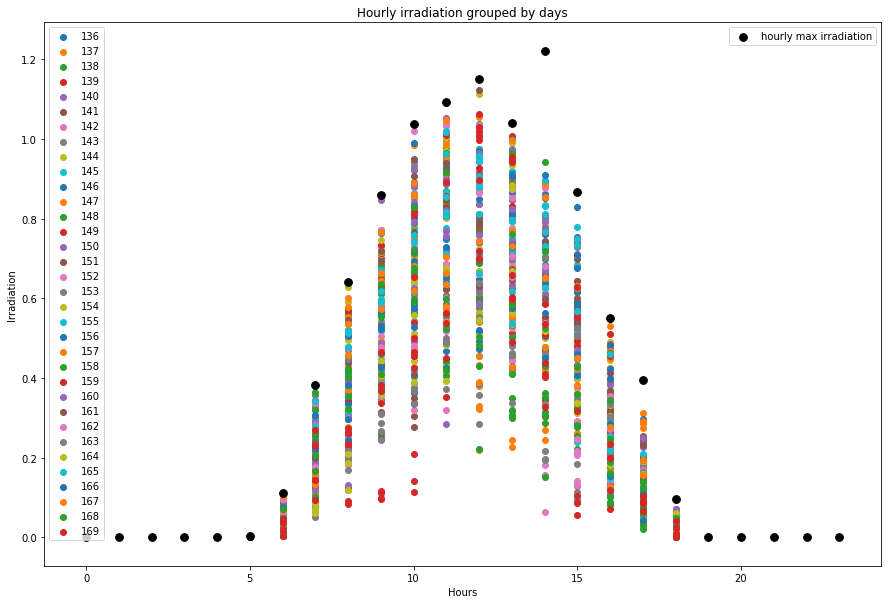

In [10]:
ax=plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    n=[plt.scatter(b['HOUR'], b['IRRADIATION'])]
m=[plt.scatter(agg_h_irr.index, agg_h_irr['IRRADIATION'], color='black', s = 60)]
legend1 = plt.legend(agg_df['DAY'], loc='upper left')
legend2 = plt.legend(m,['hourly max irradiation'], loc='upper right')
ax.add_artist(legend1)
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation grouped by days')
plt.show()

#### Measure of cloudiness of the day 136

In [11]:
# Pick day 136
day136 = weather_data[weather_data.DAY==weather_data.DAY[0]]
for i in day136['TIME']:
    ind=day136[day136['TIME']==i].index.values
    C=(day136.IRRADIATION.max()-day136.iloc[ind, 5])**2
    C_136=C.sum()
C_136

0.7986308610325399

#### Plot a distribution (histogram) of C_day values. 

In [12]:
weather_maxirr = pd.merge(weather_data, agg_h_irr, how='inner', on='HOUR')
weather_maxirr.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE_x,MODULE_TEMPERATURE_x,IRRADIATION_x,DAY,TIME,HOUR,IRRADIATION_y,MODULE_TEMPERATURE_y,AMBIENT_TEMPERATURE_y
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0,0.0,22.857507,25.184316
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,136,00:15:00,0,0.0,22.857507,25.184316
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,136,00:30:00,0,0.0,22.857507,25.184316
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,136,00:45:00,0,0.0,22.857507,25.184316
4,2020-05-17 00:00:00,4135001,HmiyD2TTLFNqkNe,24.170166,21.631490,0.0,138,00:00:00,0,0.0,22.857507,25.184316


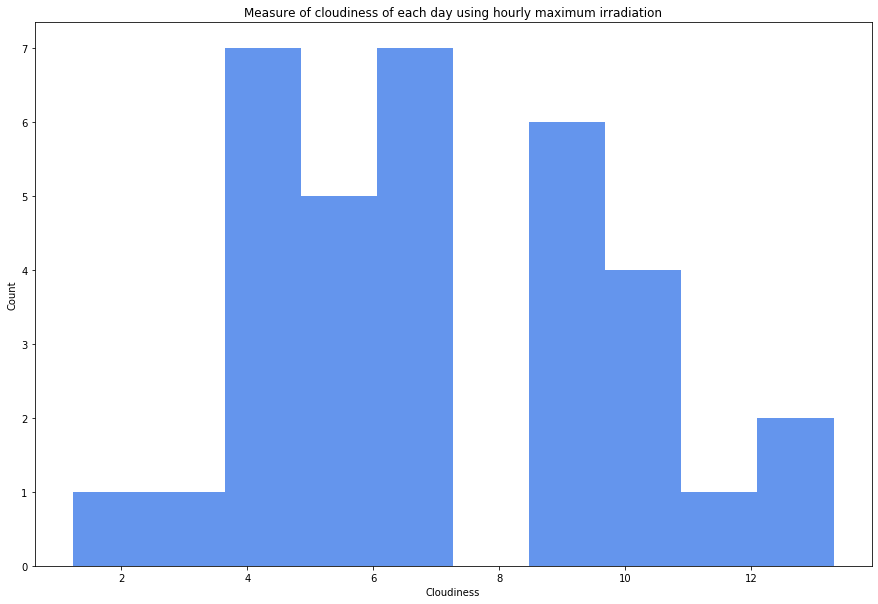

In [13]:
C_DAYlist=[]
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
    C_day = C.sum()
    C_DAYlist.append(C_day)
plt.hist(C_DAYlist, color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show() 

As far as I understand, this histogram shows the number of times each value of cloudiness happens in our data, and it does not show anthing related to the days, so I don't think we will be able to know the level of cloudiness of each day. So I will leave the barplots too, in case we need to look at the daily cloudiness measure.

I will do the same for the rest of the points too

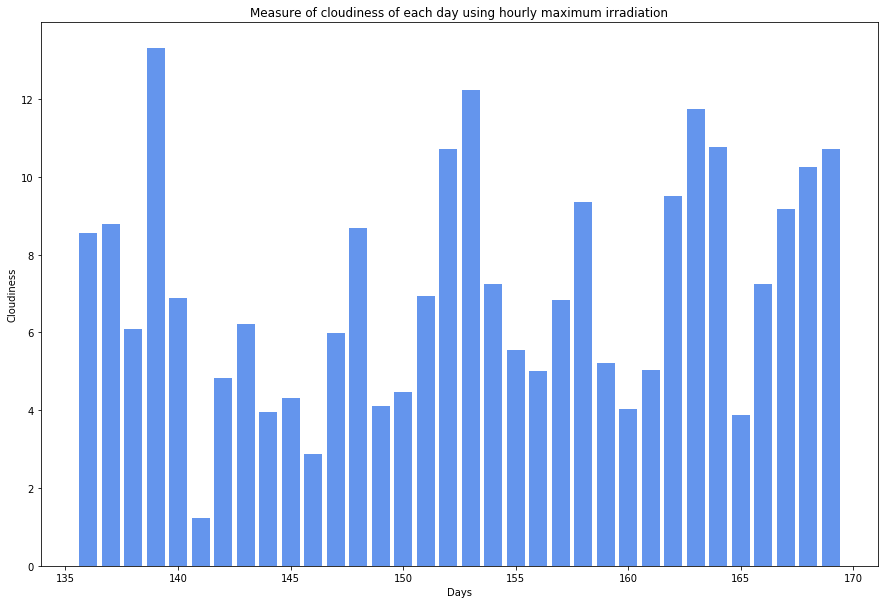

In [14]:
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
    C_day = C.sum()
    plt.bar(b.DAY,C_day ,align='center', color='cornflowerblue')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation')
plt.show()

#### In a similar manner you can calculate a correlation value of the irradiation profile of every day with the max curve. Plot a histogram of the correlation coefficients.

I don't know why I dat a problem with this graph earlier, it is working fine now :)

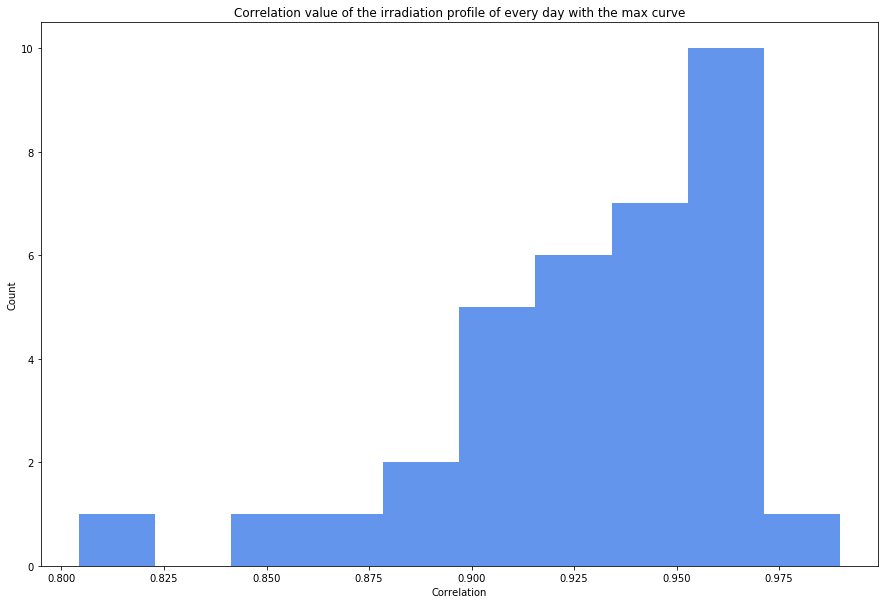

In [15]:
irr_c = []
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    c = b['IRRADIATION_x'].corr(b['IRRADIATION_y'])
    irr_c.append(c)

irr_corr = pd.DataFrame(data=np.array(irr_c), columns=['CORRELATION'])
irr_corr['DAY'] = weather_data['DAY'].unique()
plt.figure(figsize=(15, 10))
plt.hist(irr_corr['CORRELATION'], color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Correlation')
plt.title('Correlation value of the irradiation profile of every day with the max curve')
plt.show()

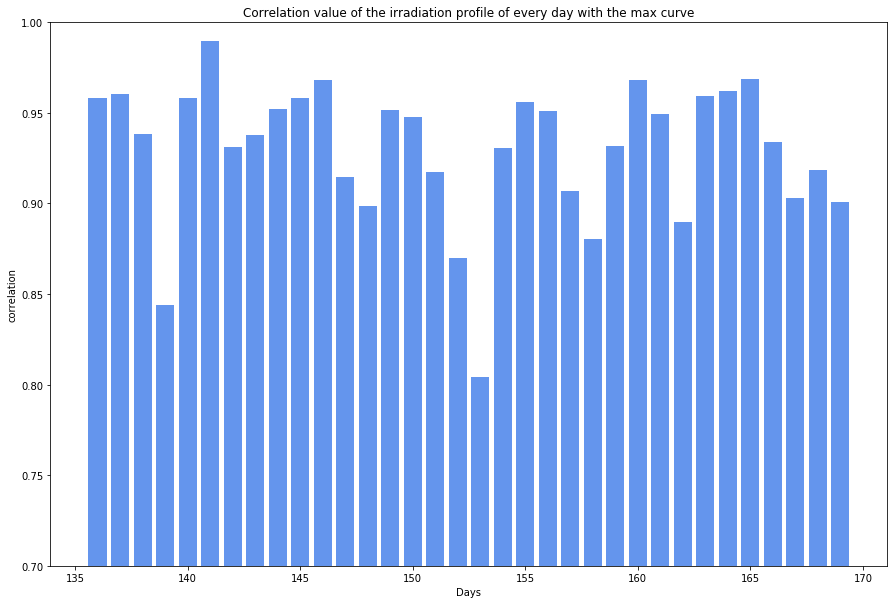

In [16]:
plt.figure(figsize=(15, 10))
plt.bar(irr_corr['DAY'], irr_corr['CORRELATION'], color='cornflowerblue')
plt.ylabel('correlation')
plt.xlabel('Days')
plt.title('Correlation value of the irradiation profile of every day with the max curve')
plt.ylim(0.7, 1)
plt.show()

#### Clean the outliers

In [17]:
outliers = []
for i, j in  weather_data.groupby(weather_data.HOUR):
    for a, b in j.groupby(j.DAY):
        irr_val=b['IRRADIATION']
        for v in irr_val:
            if v > (j['IRRADIATION'].mean()+ 3*j['IRRADIATION'].std()) or v < (j['IRRADIATION'].mean()- 3*j['IRRADIATION'].std()):
                outlier=irr_val[irr_val ==v].index
                outliers.append(outlier)
                OUTLIERS = pd.DataFrame(data=np.array(outliers), columns=['outlier_index'])
print(OUTLIERS)

   outlier_index
0            919
1           1478
2           2854
3           1810
4            777
5           2006
6             78
7             79
8           1165


In [18]:
clean_data=weather_data.copy()
print(clean_data.shape)
for i in OUTLIERS['outlier_index']:
    clean_data.drop(clean_data.loc[clean_data.index == i].index, inplace=True)
print(clean_data.shape) 

(3182, 9)
(3173, 9)


In [19]:
agg_h_irr_clean = clean_data.groupby(clean_data.DATE_TIME.dt.hour).agg({'IRRADIATION': 'max',
                                                            'MODULE_TEMPERATURE': 'max',
                                                            'AMBIENT_TEMPERATURE': 'max'})
agg_h_irr_clean['HOUR']=agg_h_irr_clean.index
agg_h_irr_clean.head()
weather_data.shape

(3182, 9)

In [20]:
weather_maxirr_clean = pd.merge(clean_data, agg_h_irr_clean, how='inner', on='HOUR')
weather_maxirr_clean.head()

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE_x,MODULE_TEMPERATURE_x,IRRADIATION_x,DAY,TIME,HOUR,IRRADIATION_y,MODULE_TEMPERATURE_y,AMBIENT_TEMPERATURE_y
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0,136,00:00:00,0,0.0,22.857507,25.184316
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0,136,00:15:00,0,0.0,22.857507,25.184316
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0,136,00:30:00,0,0.0,22.857507,25.184316
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0,136,00:45:00,0,0.0,22.857507,25.184316
4,2020-05-17 00:00:00,4135001,HmiyD2TTLFNqkNe,24.170166,21.631490,0.0,138,00:00:00,0,0.0,22.857507,25.184316


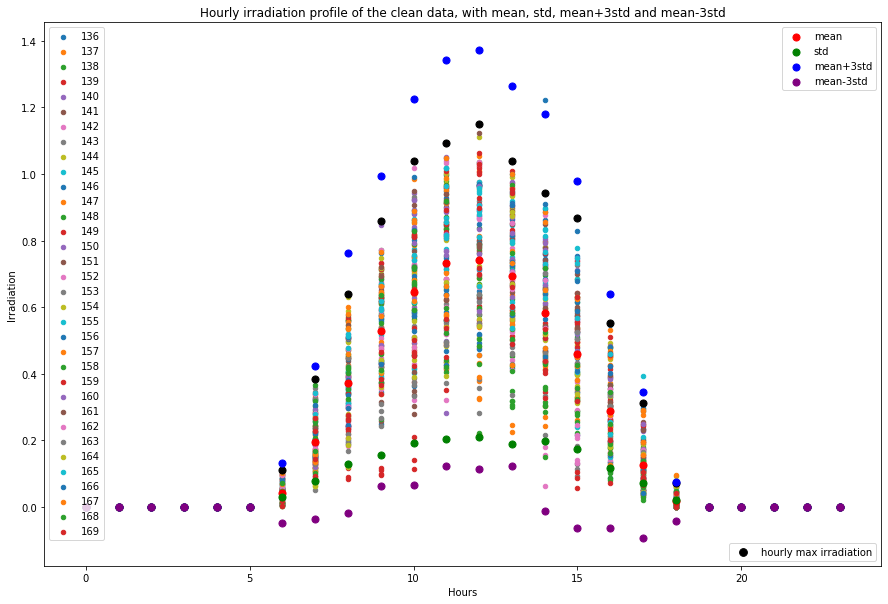

In [21]:
ax =plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    plt.scatter(b['HOUR'], b['IRRADIATION'], s=20)
plt.scatter(agg_h_irr_clean.index, agg_h_irr_clean['IRRADIATION'], color='black', s=50)
for i, j in  weather_data.groupby(weather_data.HOUR):
    custom_point=[plt.scatter(i, (j['IRRADIATION'].mean()), color='red', s=50),
                   plt.scatter(i, (j['IRRADIATION'].std()), color='green', s=50),
                   plt.scatter(i, (j['IRRADIATION'].mean()+ 3*j['IRRADIATION'].std()), color='blue', s=50),
                   plt.scatter(i, (j['IRRADIATION'].mean()- 3*j['IRRADIATION'].std()), color='purple', s=50)]
legend1 = plt.legend(agg_df['DAY'], loc='upper left')
legend2 = plt.legend(custom_point, ['mean', 'std', 'mean+3std', 'mean-3std'], loc='upper right')
legend3 = plt.legend(m,['hourly max irradiation'], loc='lower right')
ax.add_artist(legend1)
ax.add_artist(legend2)
plt.ylabel('Irradiation')
plt.xlabel('Hours')
plt.title('Hourly irradiation profile of the clean data, with mean, std, mean+3std and mean-3std')
plt.show()

The maximum curve here is smoother when the outliers are removed

#### C_day using clean data

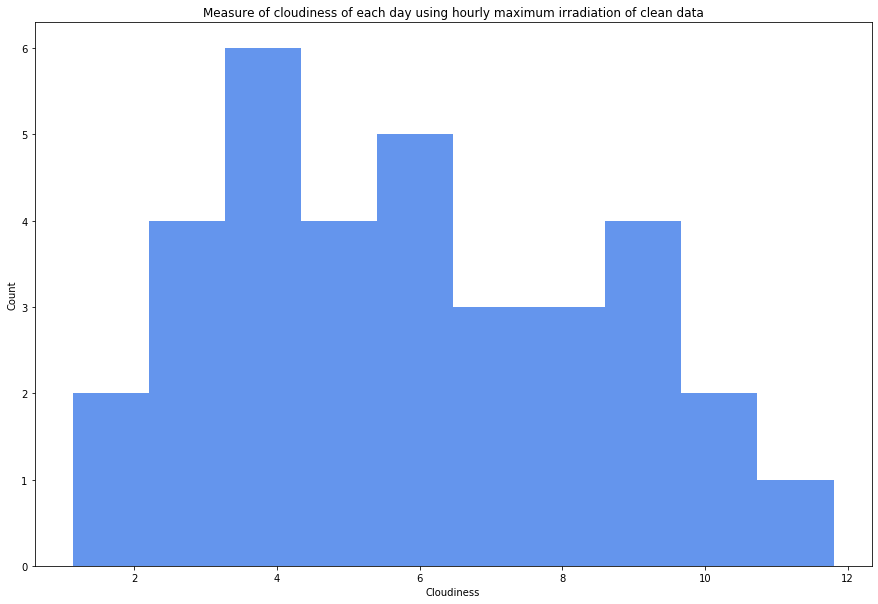

In [22]:
C_day_clean=[]
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr_clean.groupby(weather_maxirr_clean['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
    C_day = C.sum()
    C_day_clean.append(C_day)
plt.hist(C_day_clean, color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation of clean data')
plt.show() 

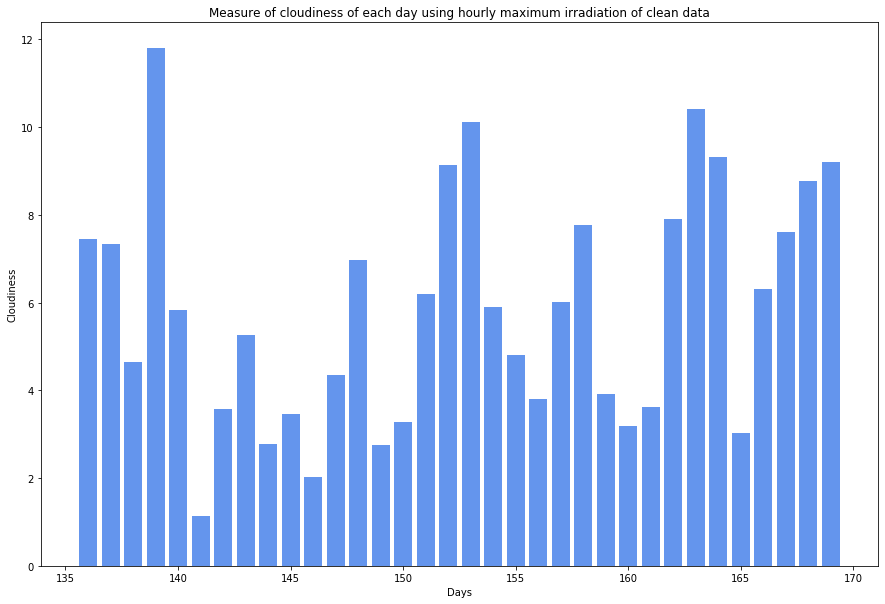

In [23]:
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr_clean.groupby(weather_maxirr_clean['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.IRRADIATION_y-b.loc[ind, 'IRRADIATION_x'])**2
    C_day = C.sum()
    plt.bar(b.DAY,C_day ,align='center', color='cornflowerblue')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using hourly maximum irradiation of clean data')
plt.show()

## Overplot module temperature profiles for many days 

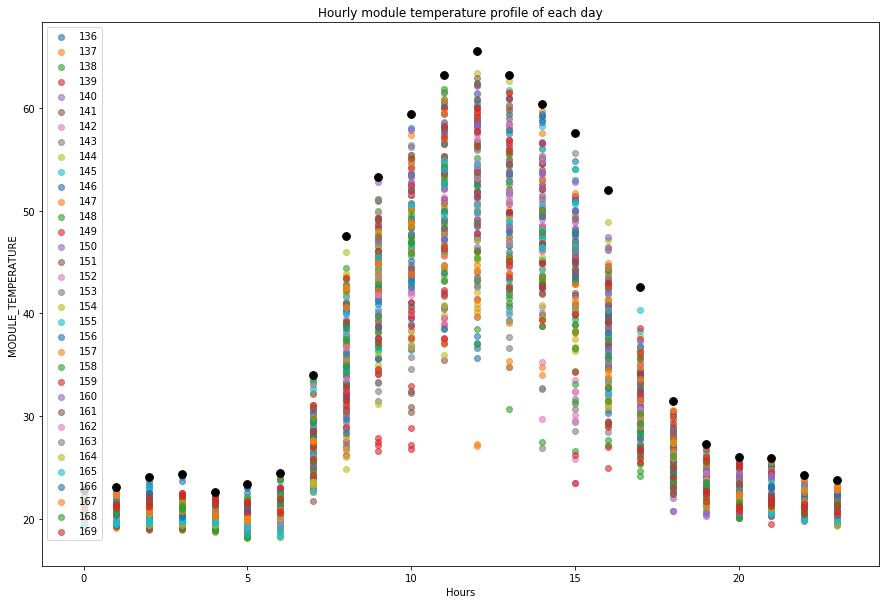

In [24]:
plt.figure(figsize=(15, 10))
for a, b in weather_data.groupby(weather_data['DAY']):
    plt.scatter(b['HOUR'], b['MODULE_TEMPERATURE'], alpha = 0.6)
plt.scatter(agg_h_irr.index, agg_h_irr['MODULE_TEMPERATURE'], color='black', s=60)
plt.legend(agg_df['DAY'])
plt.ylabel('MODULE_TEMPERATURE')
plt.xlabel('Hours')
plt.title('Hourly module temperature profile of each day')
plt.show()

#### Calculating C_day also for module temperature might be interesting as we can compare and convince ourselves that the days where module temperature is very much off the max behaviour coincide with those where irradiation is off the max behaviour.

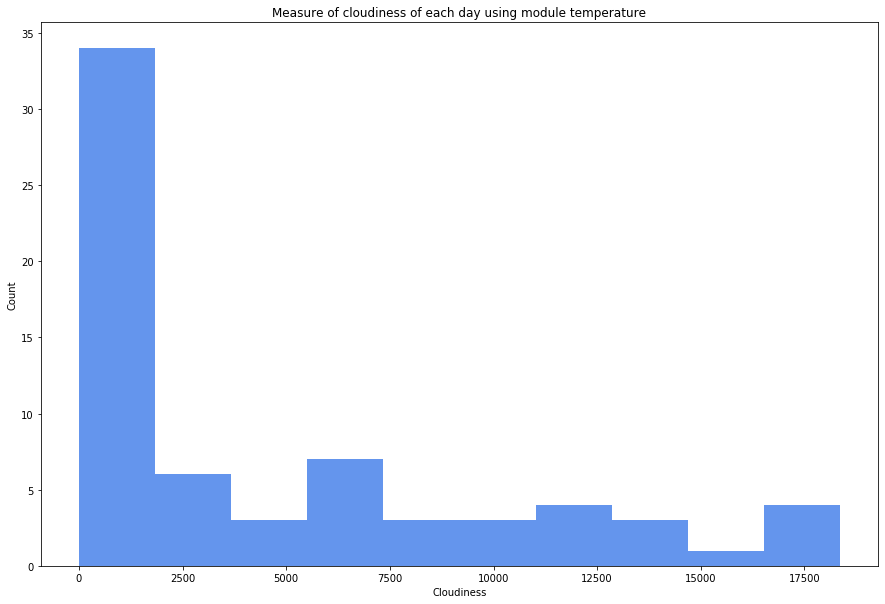

In [25]:
C_day_mod=[]
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.MODULE_TEMPERATURE_y-b.loc[ind, 'MODULE_TEMPERATURE_x'])**2
    C_day = C.sum()
    C_day_clean.append(C_day)
plt.hist(C_day_clean, color='cornflowerblue')
plt.ylabel('Count')
plt.xlabel('Cloudiness')
plt.title('Measure of cloudiness of each day using module temperature')
plt.show() 

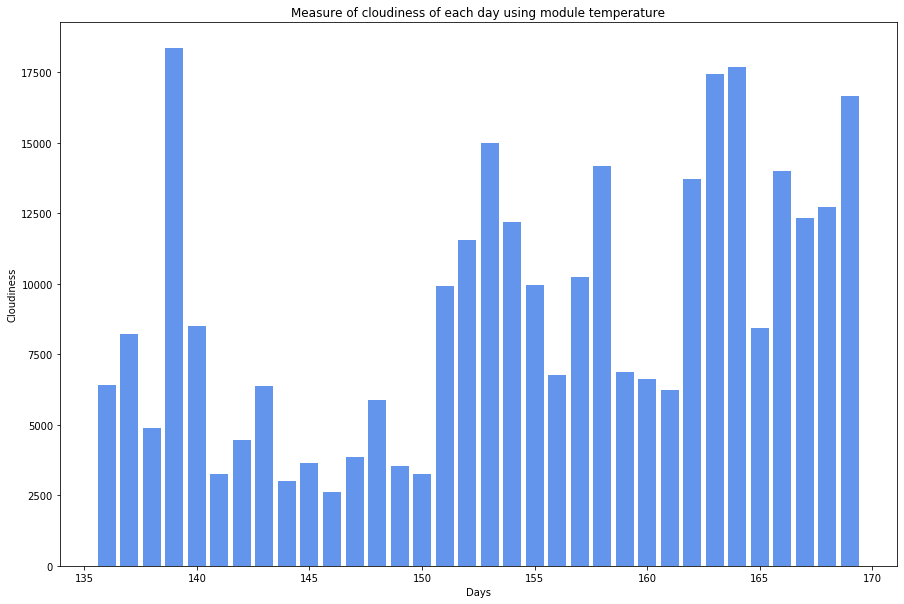

In [26]:
plt.figure(figsize=(15, 10))
for a, b in weather_maxirr.groupby(weather_maxirr['DAY']):
    ind = b[b['DAY']==a].index.values
    C = (b.MODULE_TEMPERATURE_y-b.loc[ind, 'MODULE_TEMPERATURE_x'])**2
    C_day = C.sum()
    plt.bar(b.DAY,C_day ,align='center', color='cornflowerblue')
plt.ylabel('Cloudiness')
plt.xlabel('Days')
plt.title('Measure of cloudiness of each day using module temperature')
plt.show()

## Plot DC power vs AC power

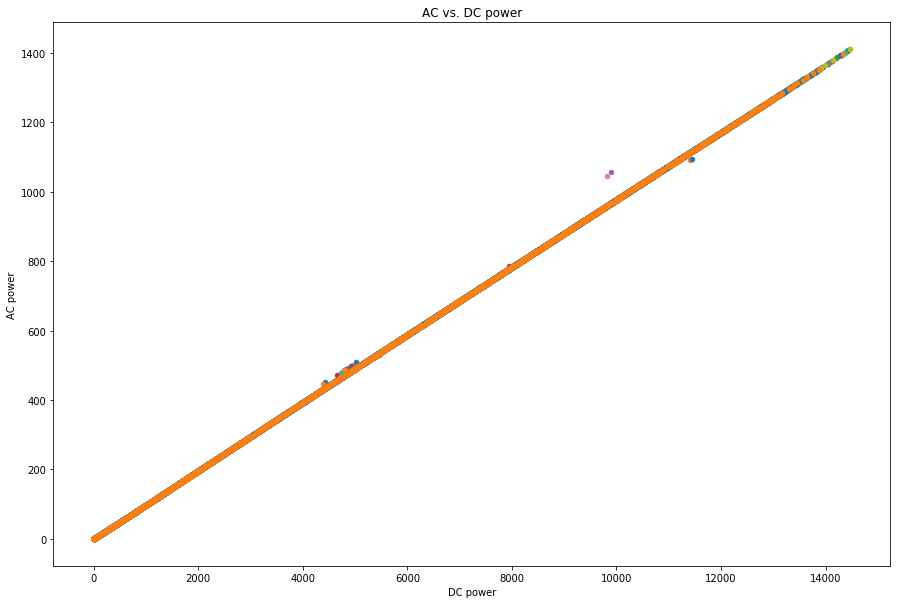

In [27]:
plt.figure(figsize=(15, 10))
for i, source_key in gen_data.groupby(gen_data.SOURCE_KEY):
    m =[plt.scatter(source_key['DC_POWER'], source_key['AC_POWER'], s=20)]
#plt.legend(m, i)
plt.xlabel('DC power')
plt.ylabel('AC power')
plt.title('AC vs. DC power')
plt.show()

#### Investigate the outliers

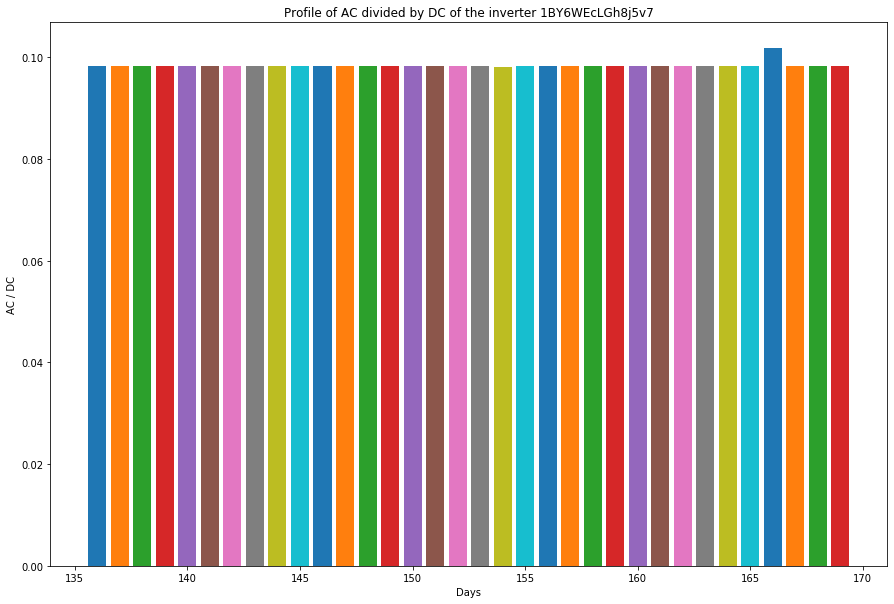

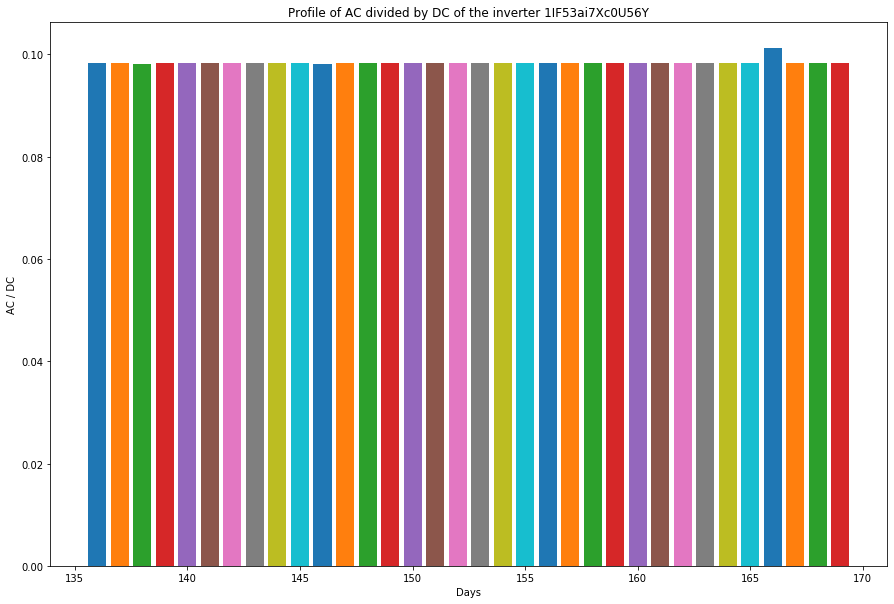

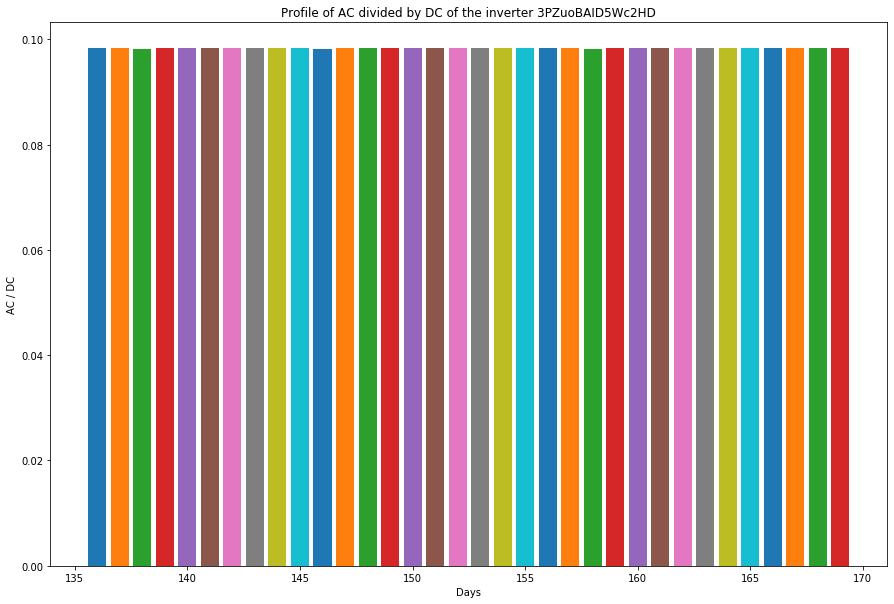

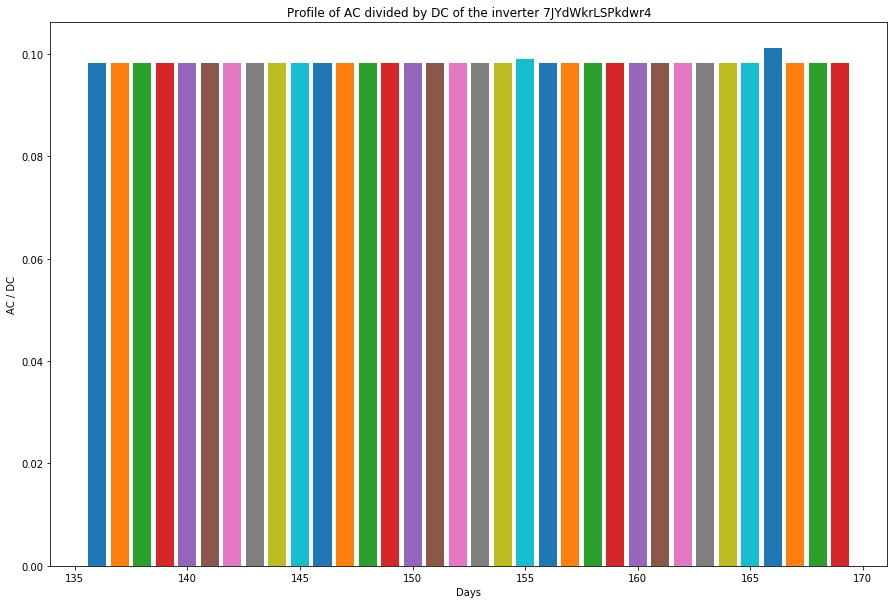

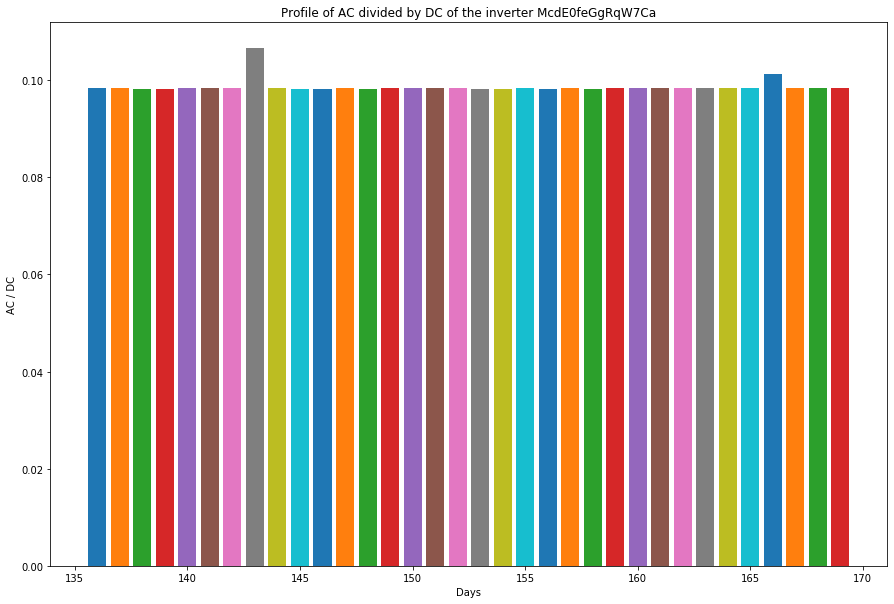

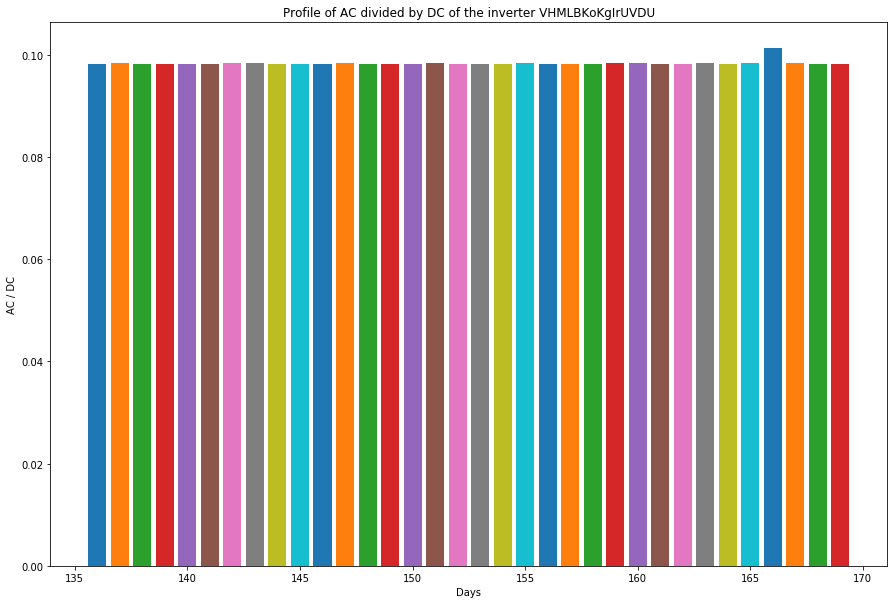

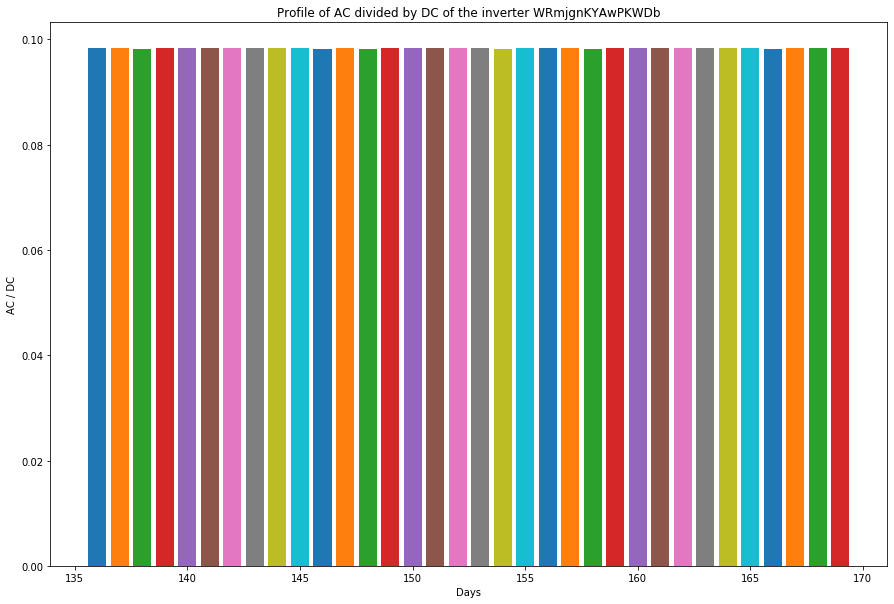

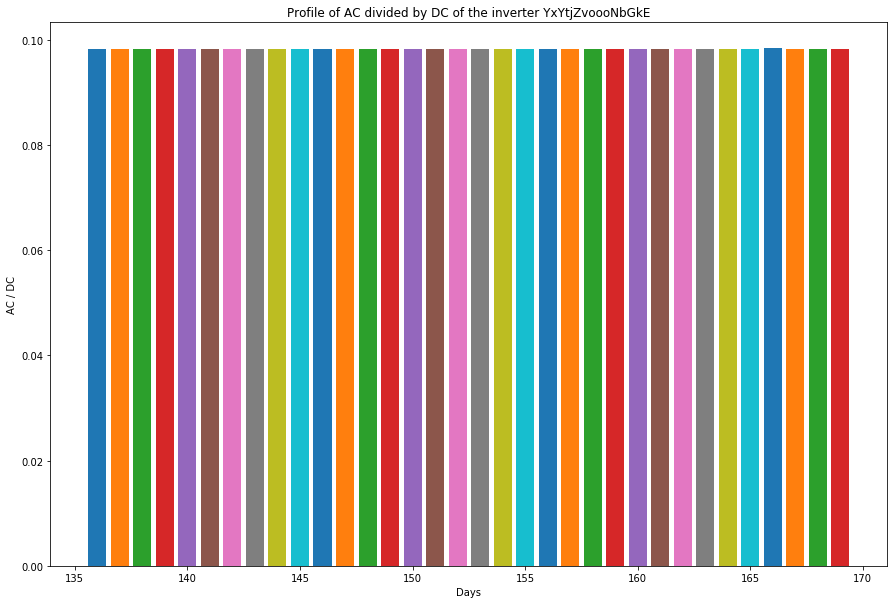

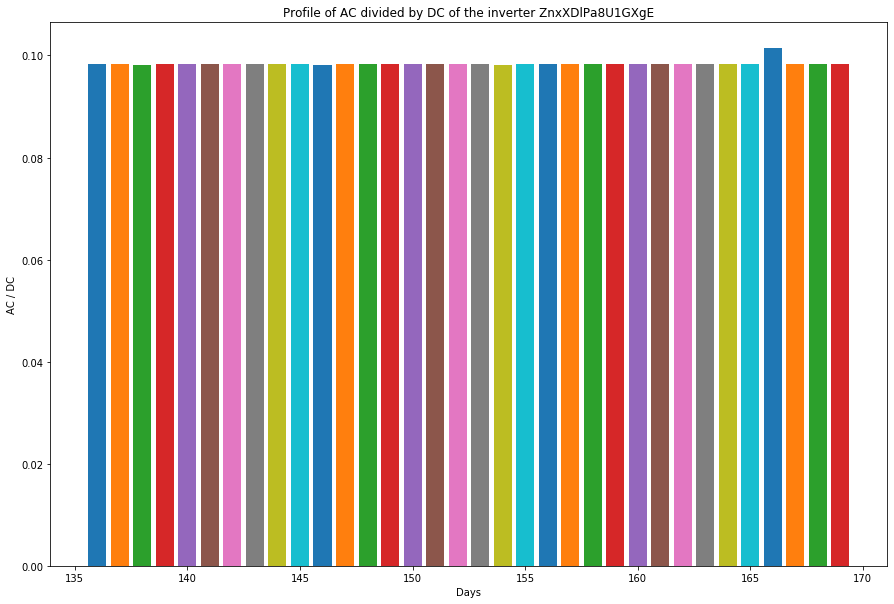

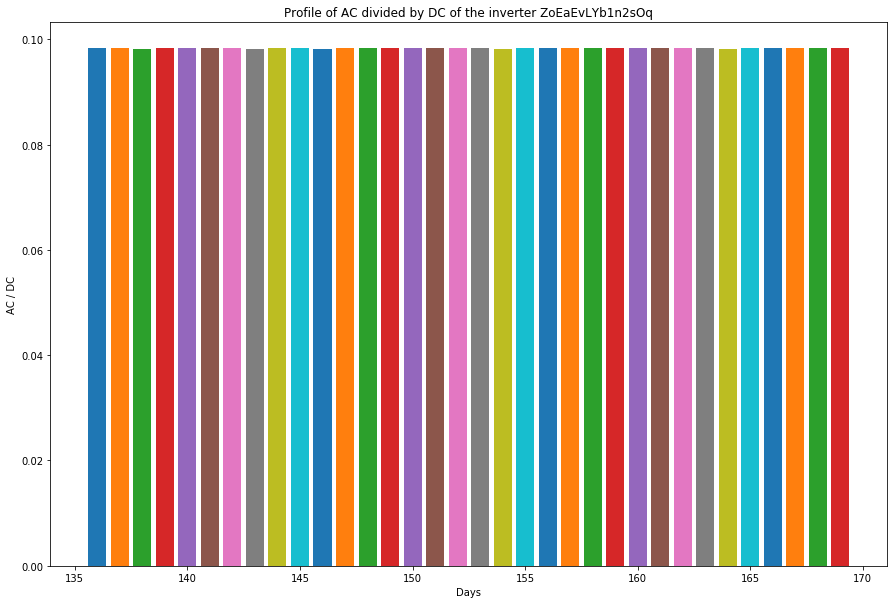

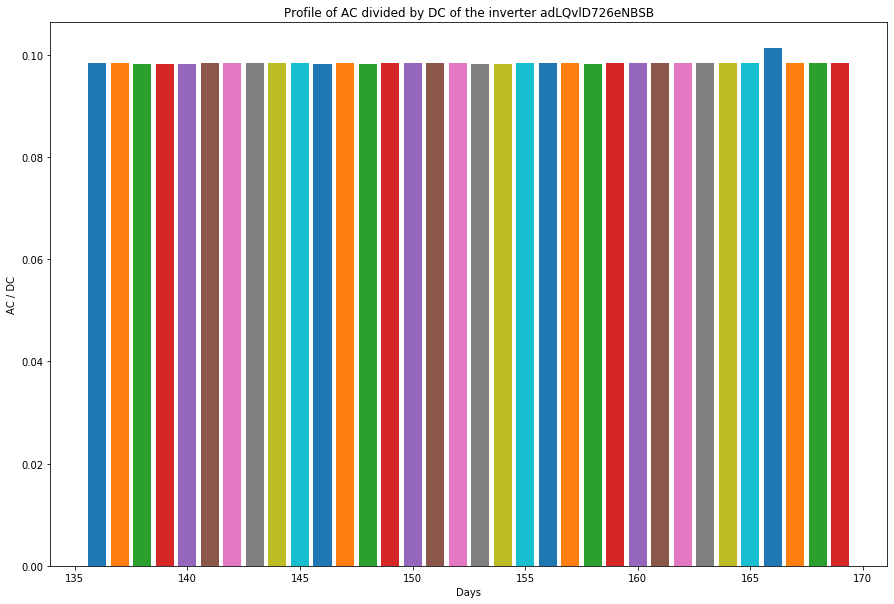

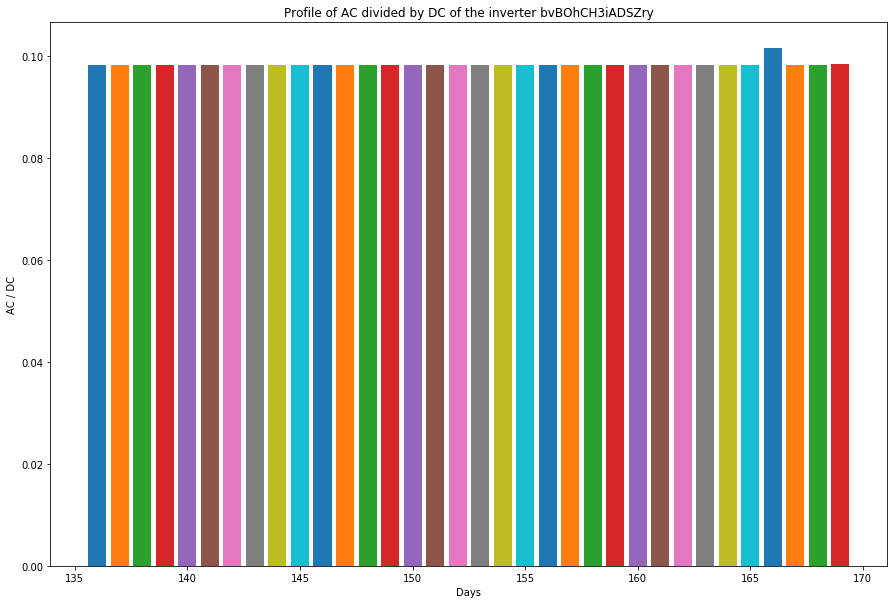

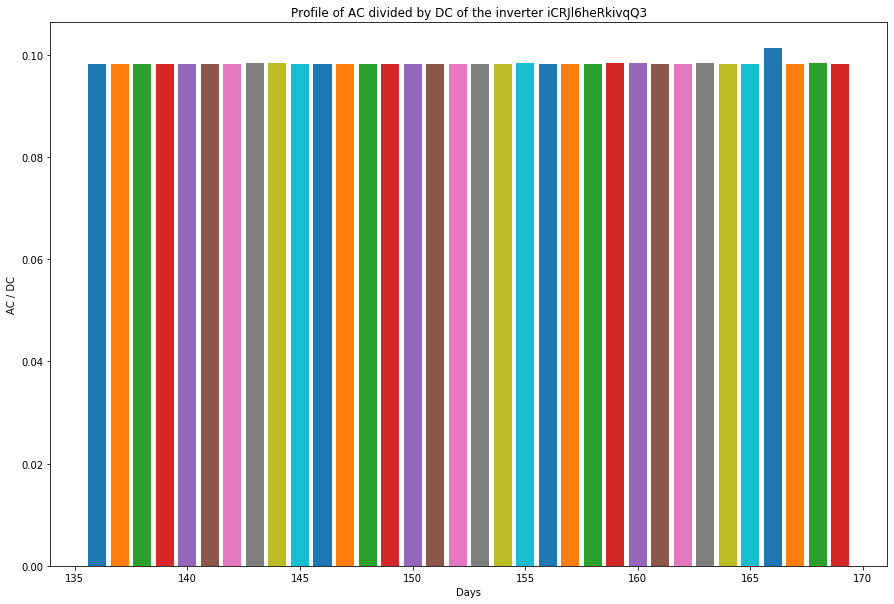

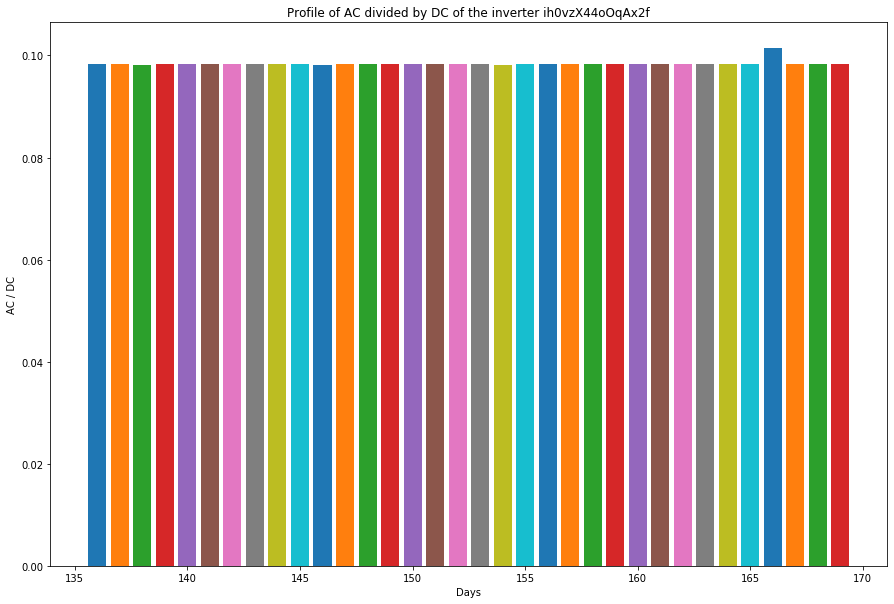

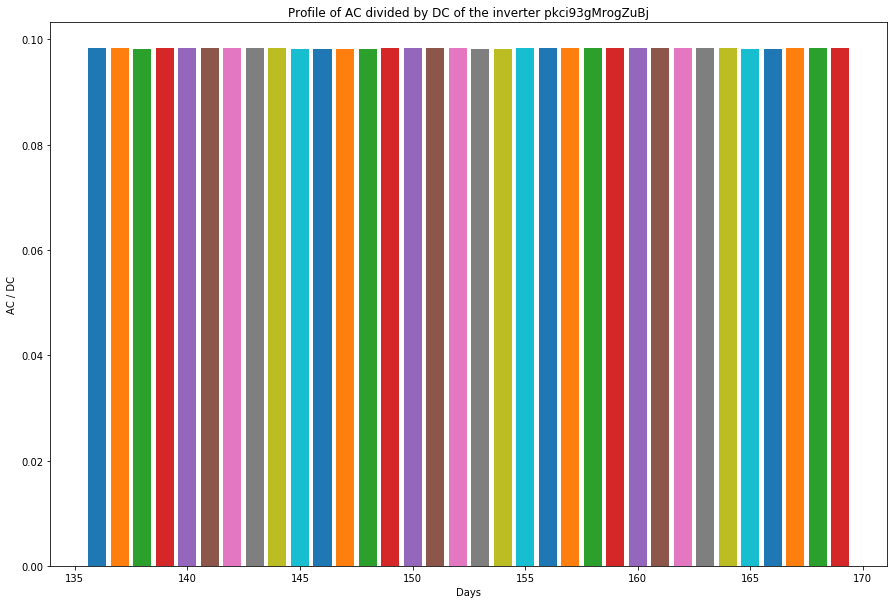

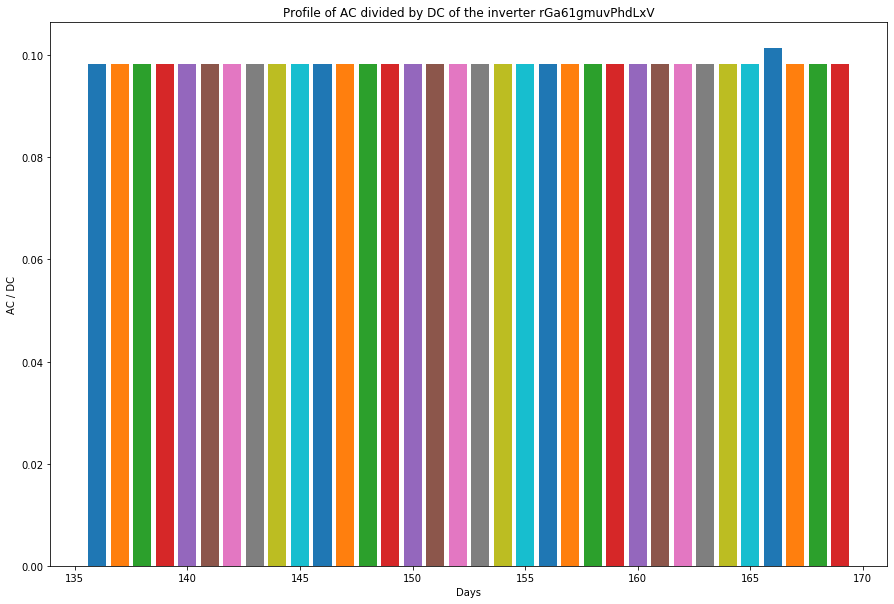

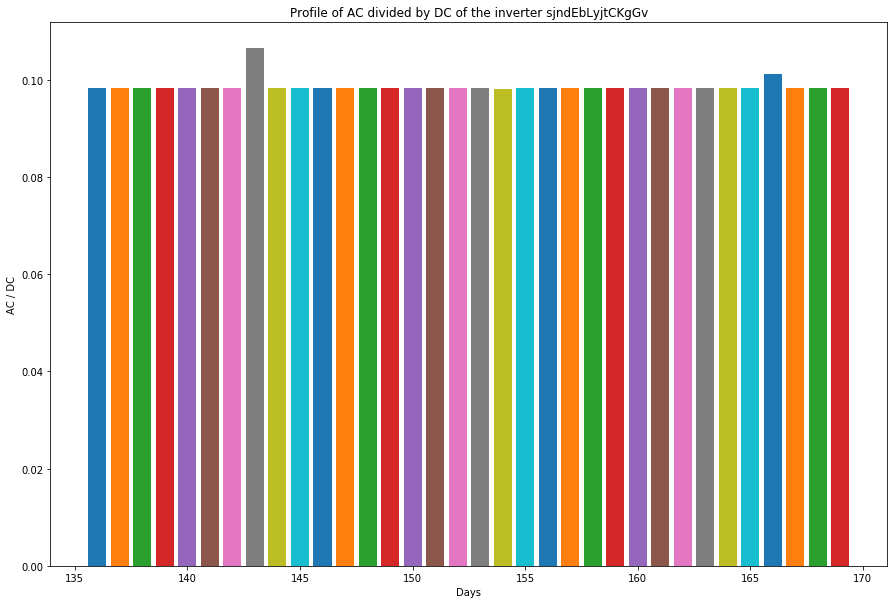

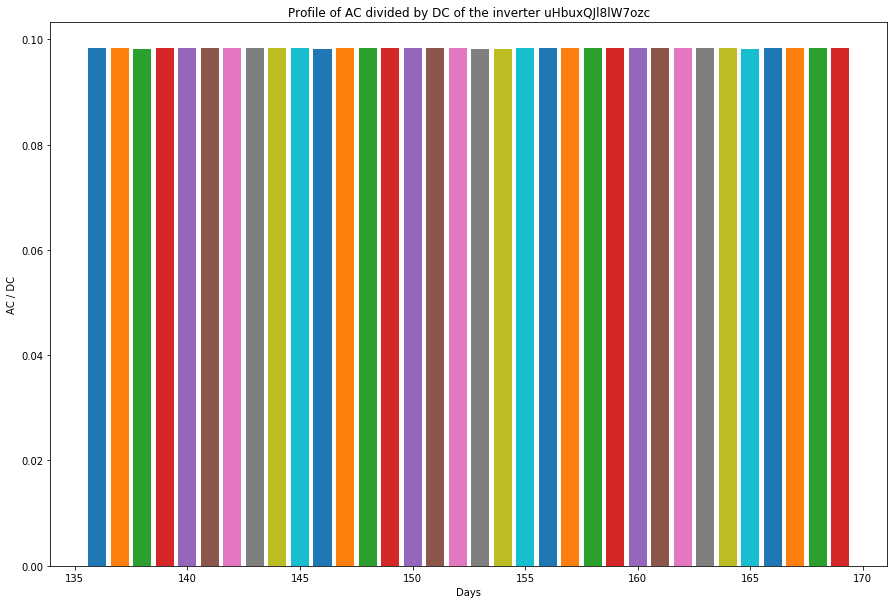

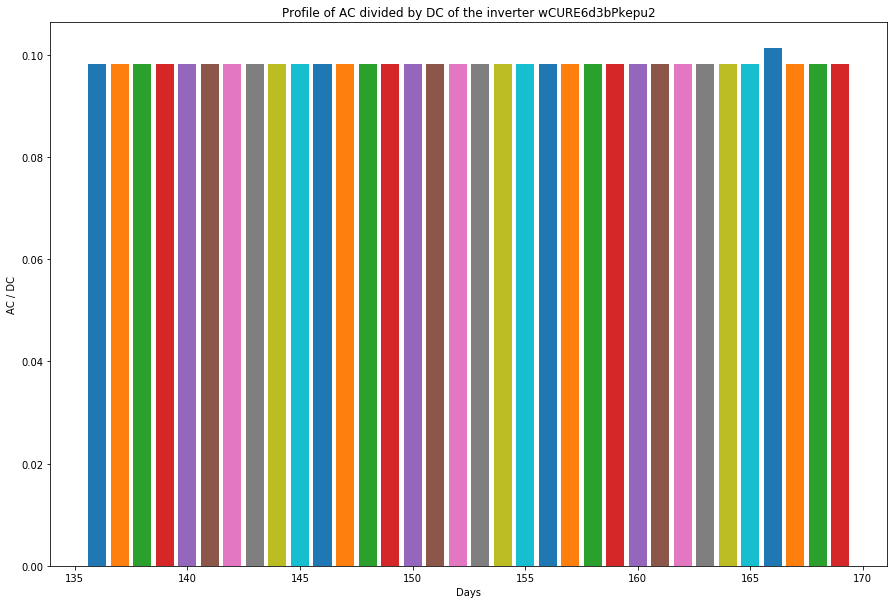

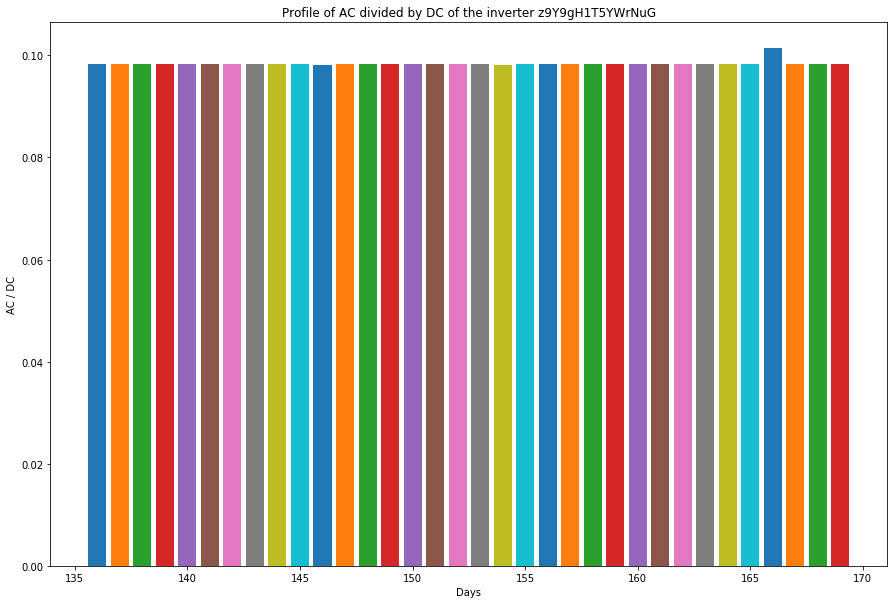

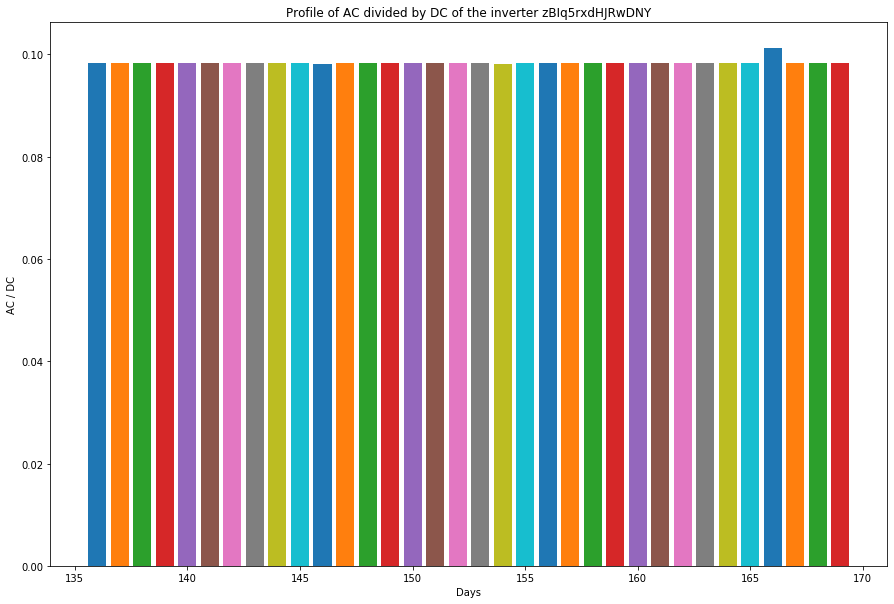

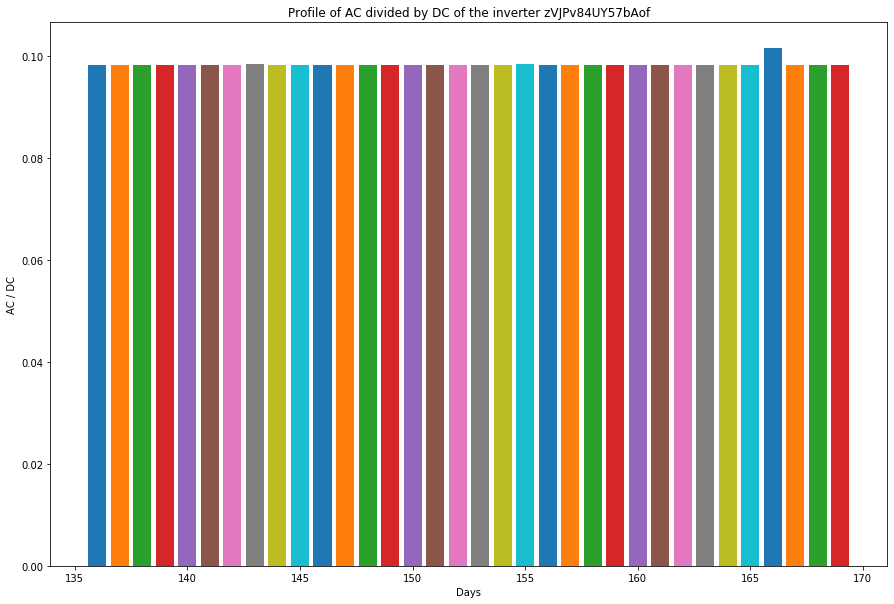

In [28]:
for i, source_key in gen_data.groupby(gen_data.SOURCE_KEY):
    plt.figure(figsize=(15, 10))
    for a, b in source_key.groupby(source_key.DAY):
        ACDC = b.AC_POWER / b.DC_POWER
        plt.bar(b.DAY, ACDC)
    plt.xlabel('Days')
    plt.ylabel('AC / DC')
    plt.title('Profile of AC divided by DC of the inverter '+i )
    plt.show()

We can notice that the only days during which AC/DC is not equal to 0.10 are the days 143 and 166. So let's take a cloder look at those days.

In [29]:
day143=gen_data[gen_data['DAY']==143]
day166=gen_data[gen_data['DAY']==166]

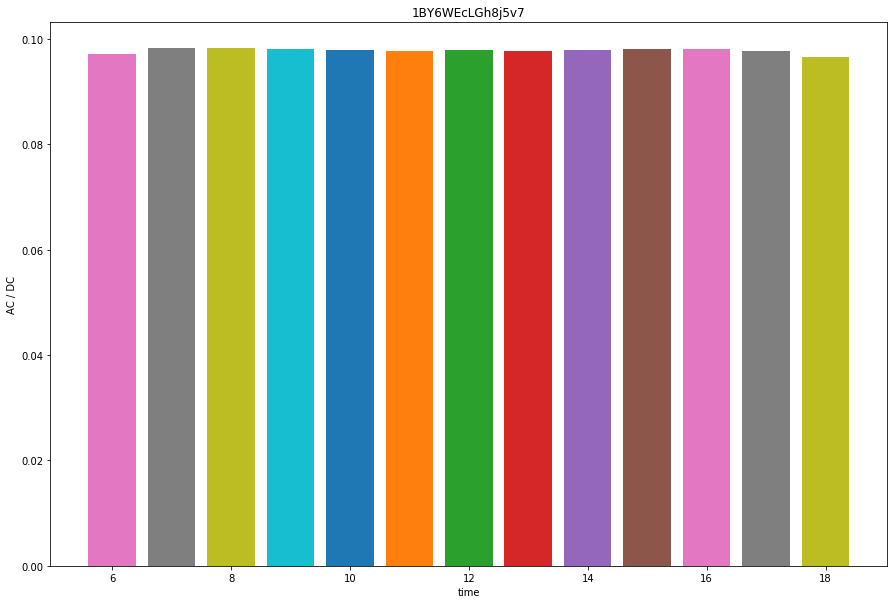

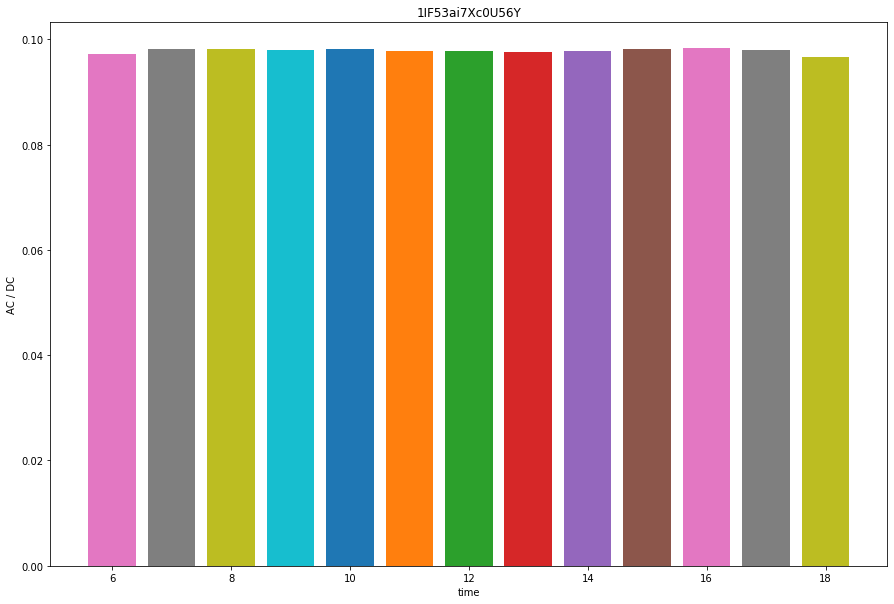

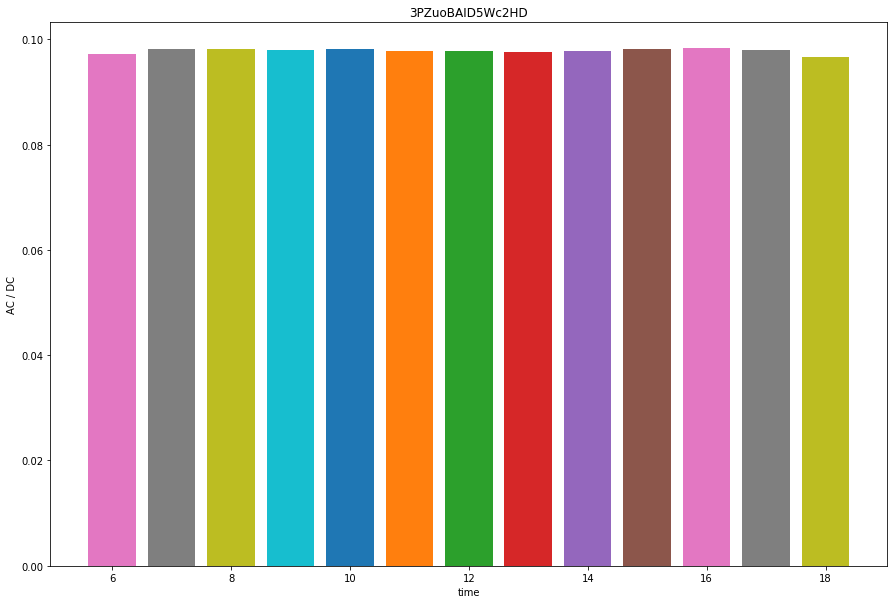

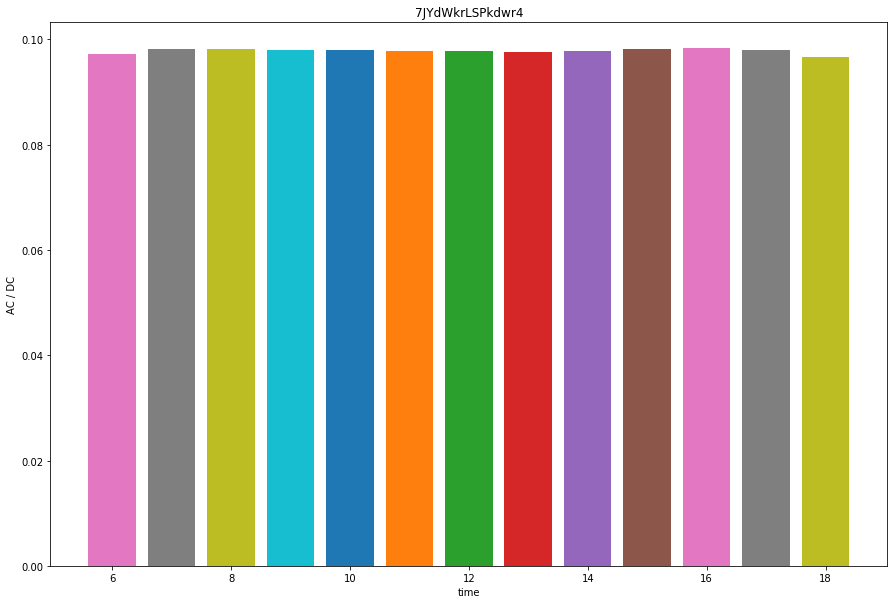

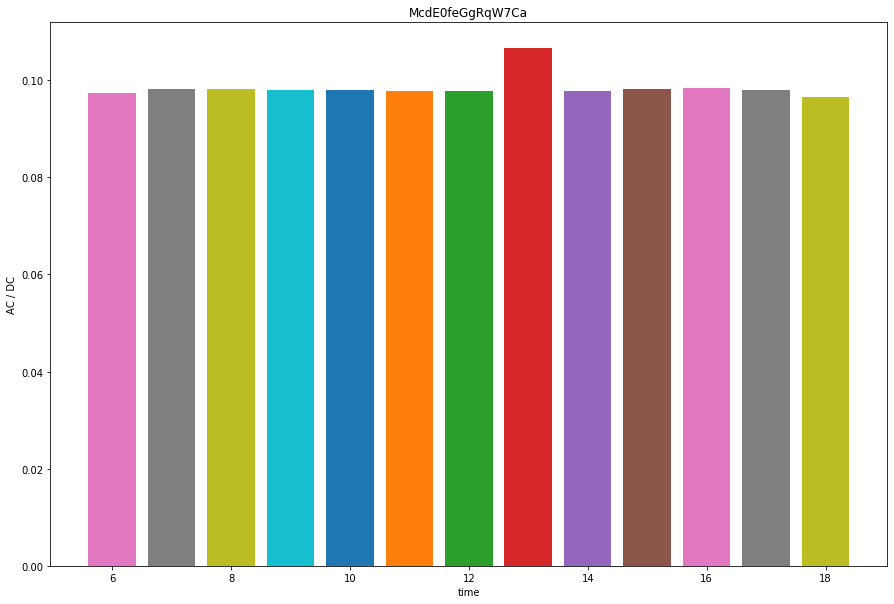

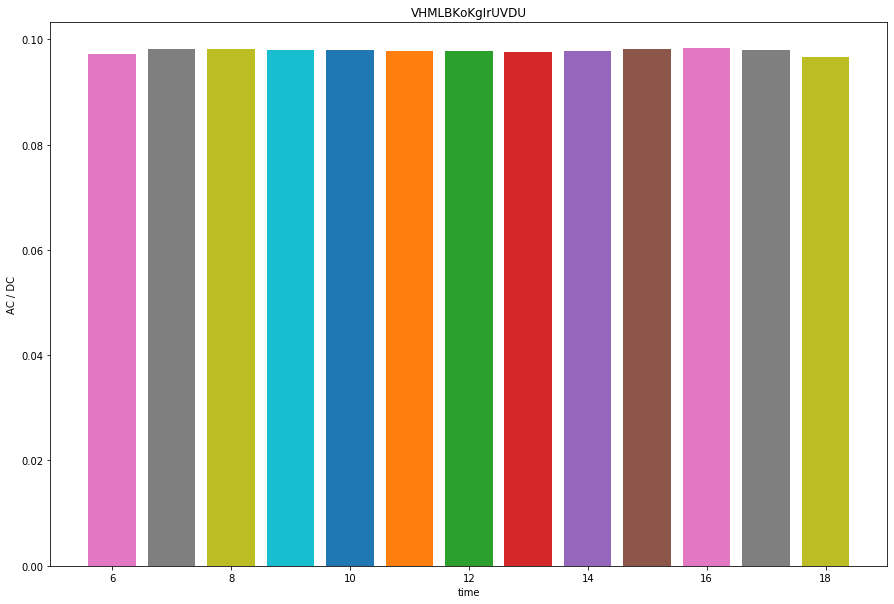

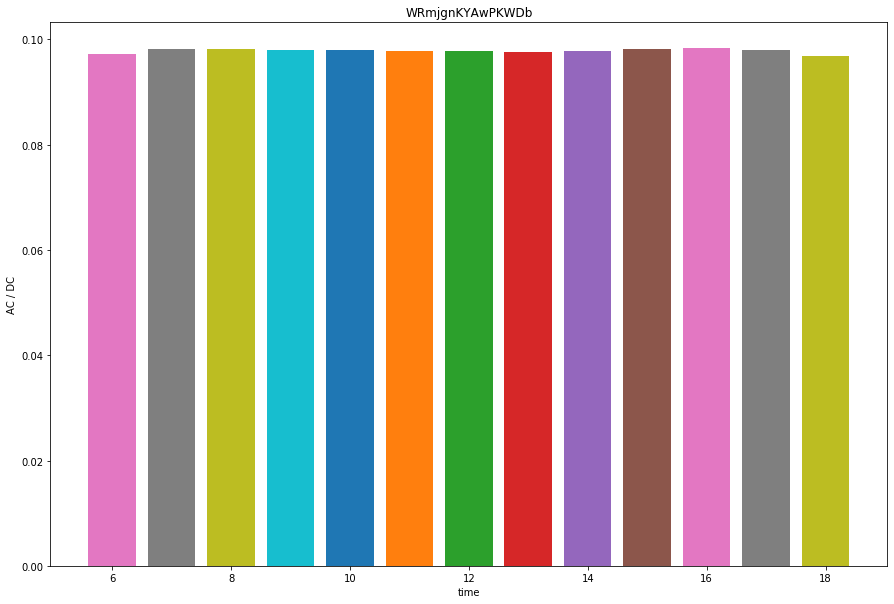

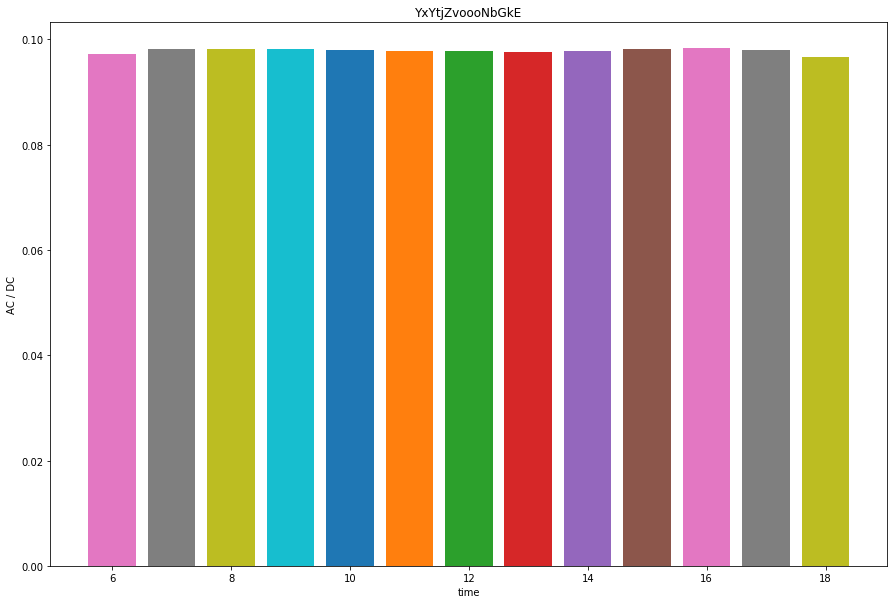

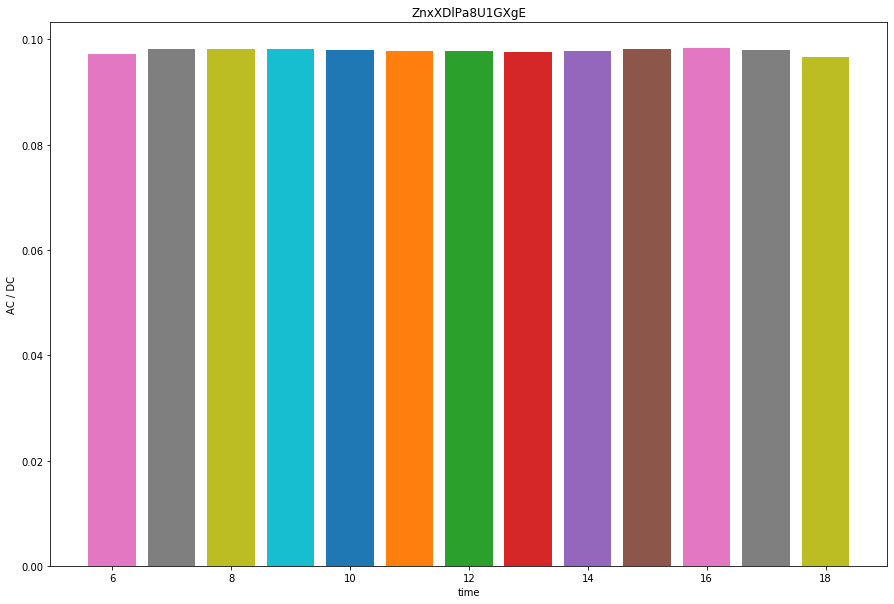

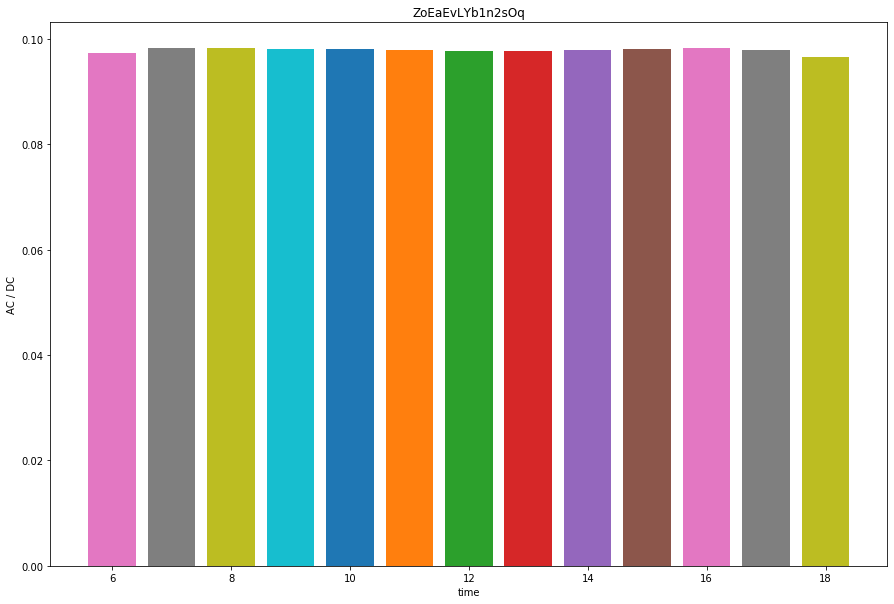

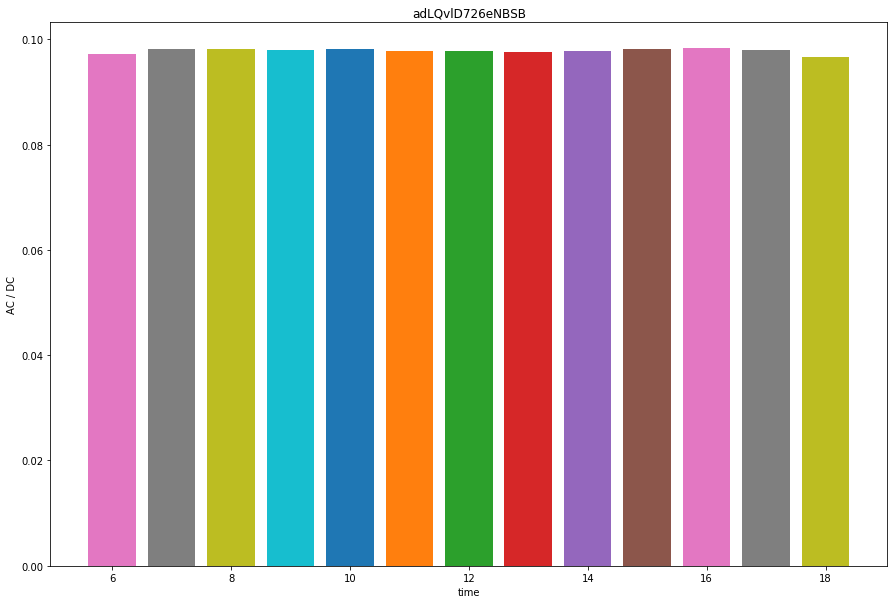

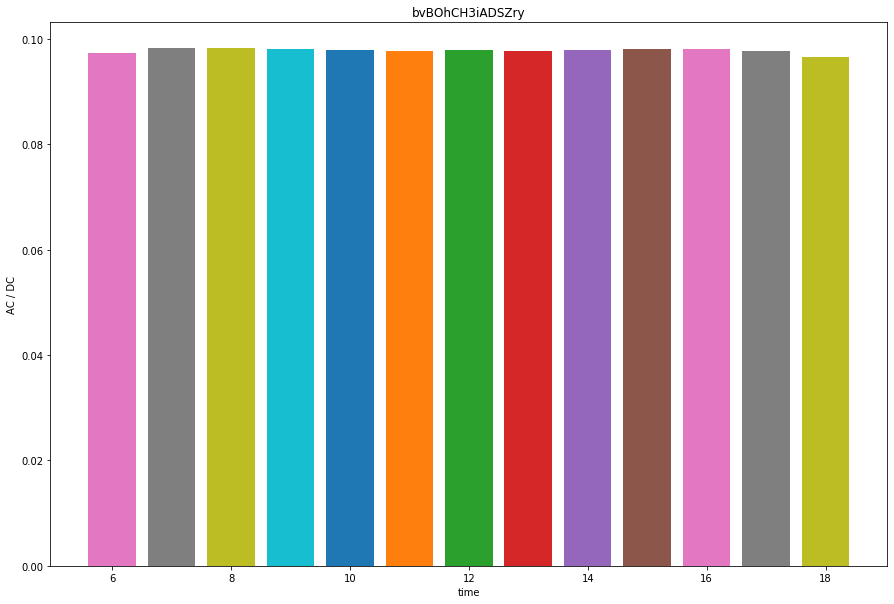

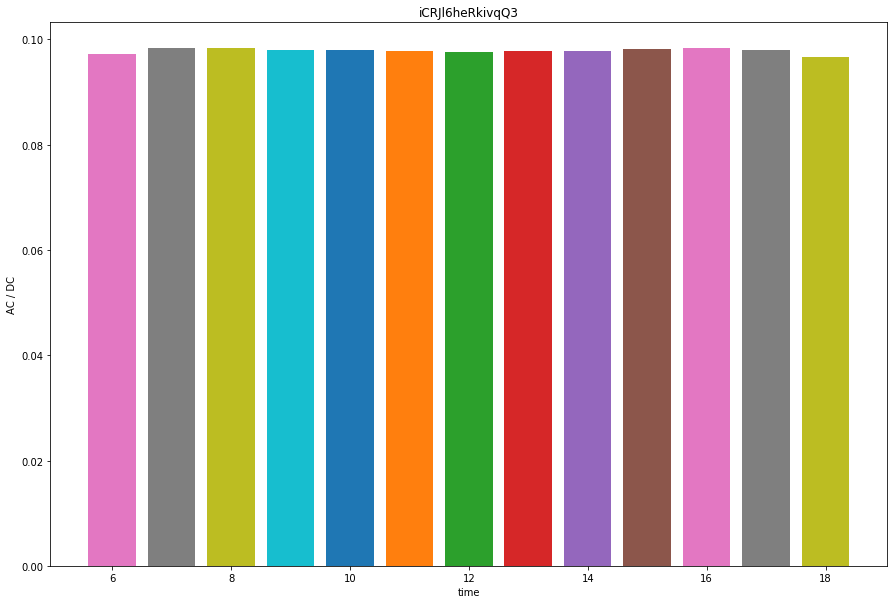

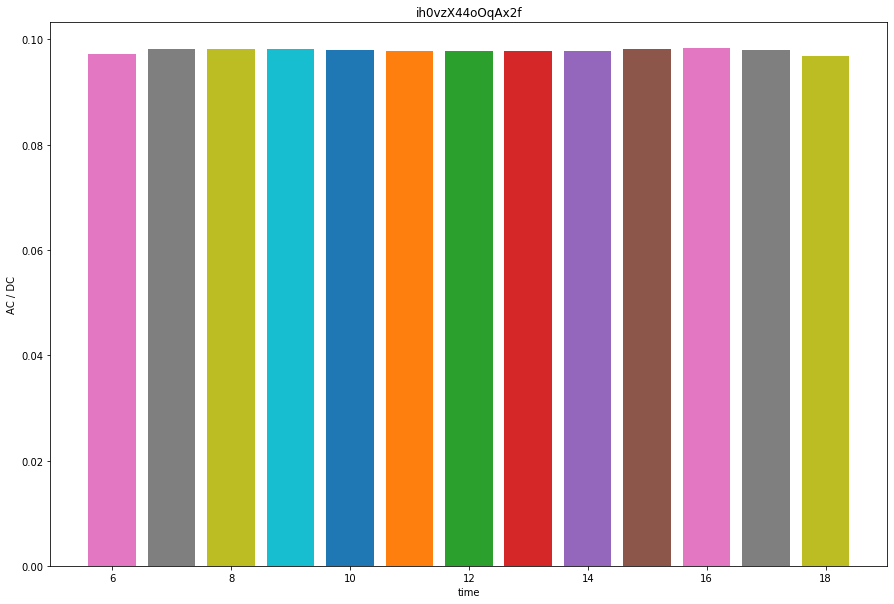

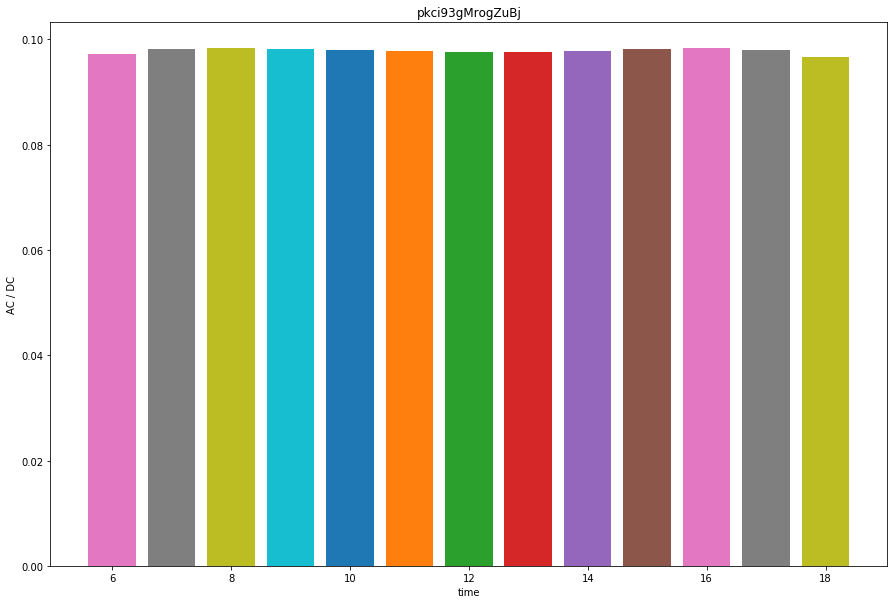

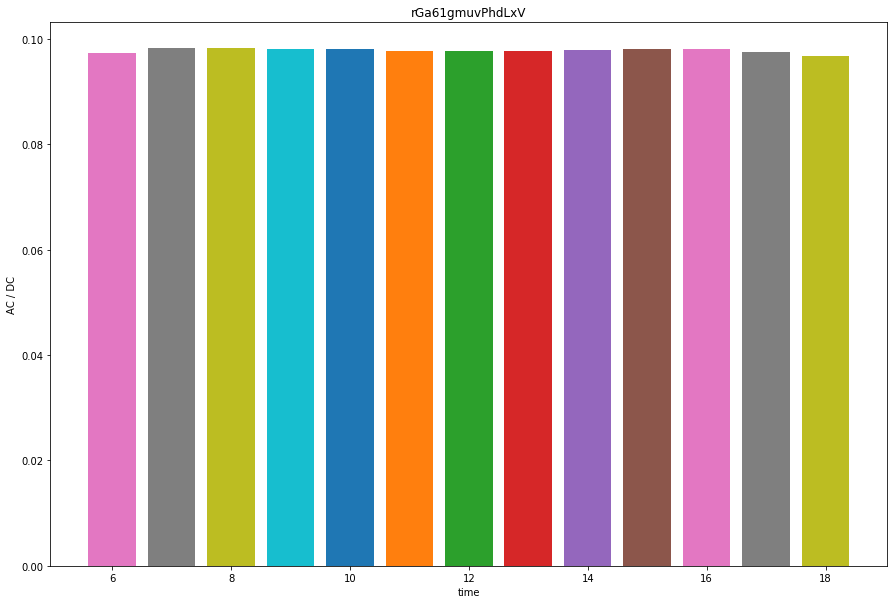

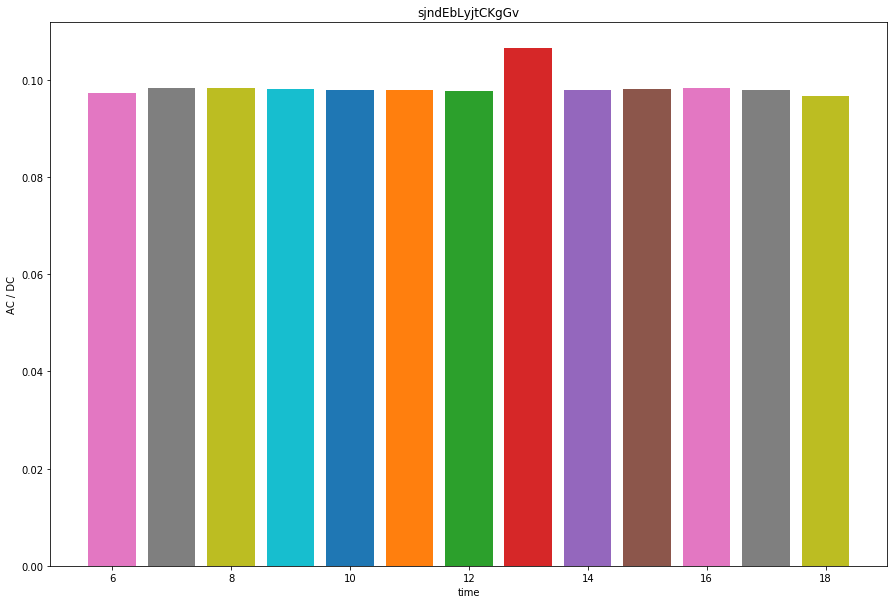

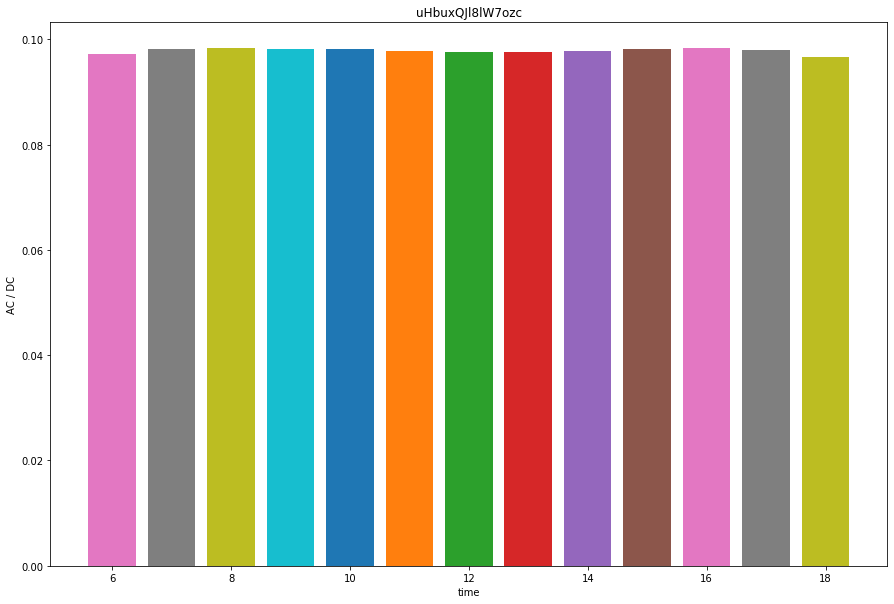

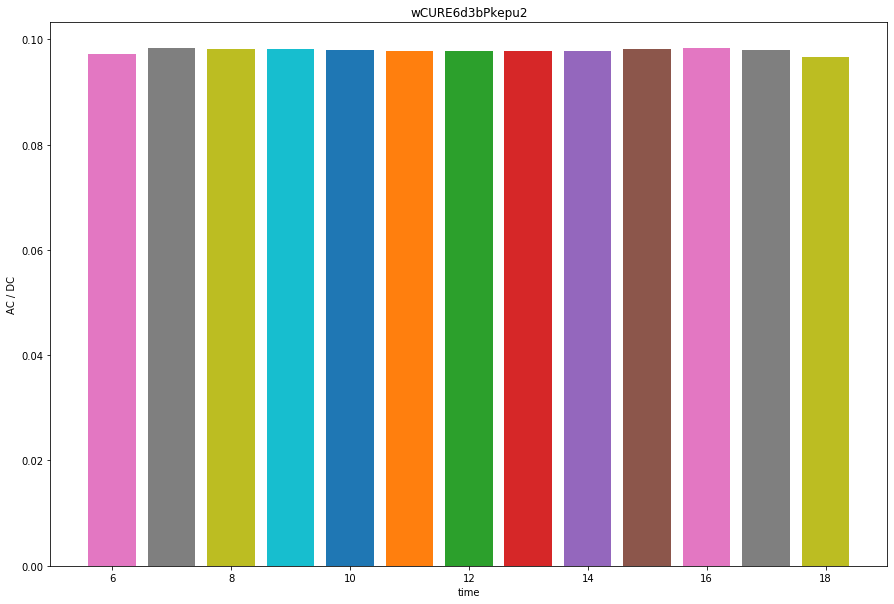

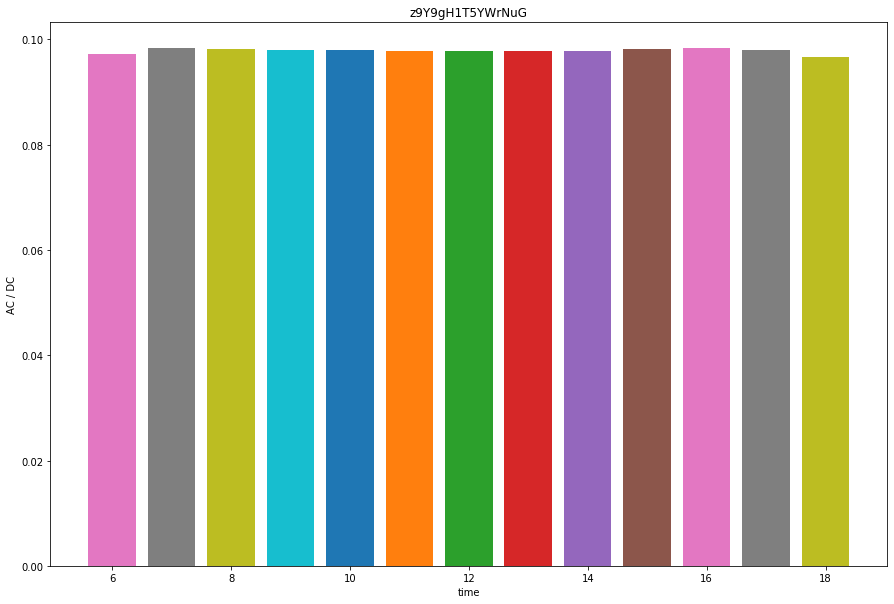

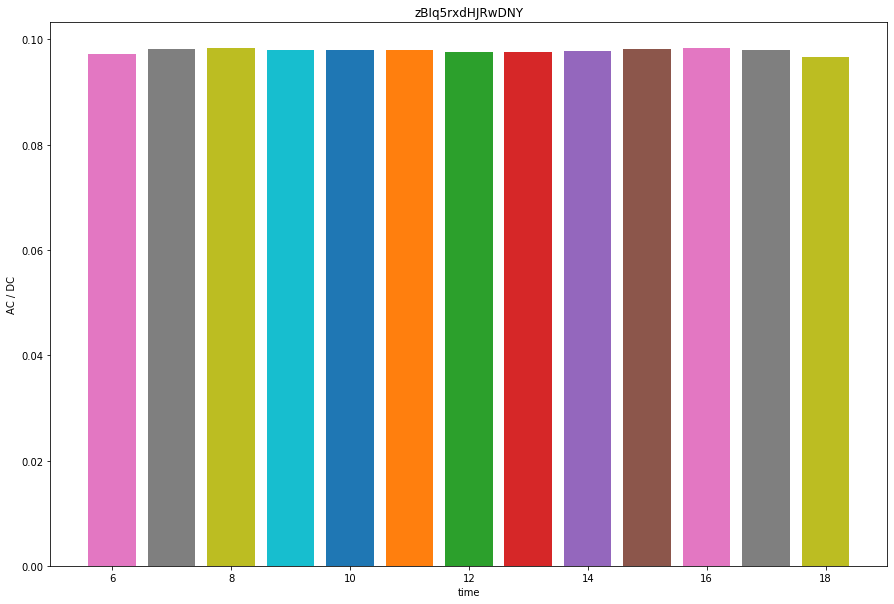

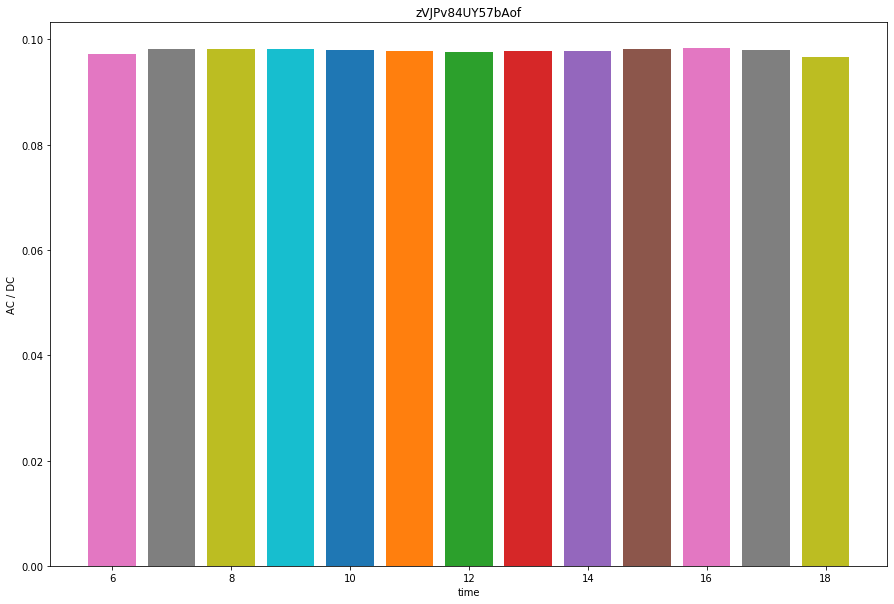

In [30]:
for i, source_key in day143.groupby(day143.SOURCE_KEY):
    plt.figure(figsize=(15, 10))
    for a, b in source_key.groupby(source_key.HOUR):
        ACDC = b.AC_POWER / b.DC_POWER
        plt.bar(b.HOUR, ACDC)
    plt.xlabel('time')
    plt.ylabel('AC / DC')
    plt.title(i)
    plt.show()

The time of day 143 where the outliers occur is 13, and the inverter is McdEOfeGgRqW7Ca

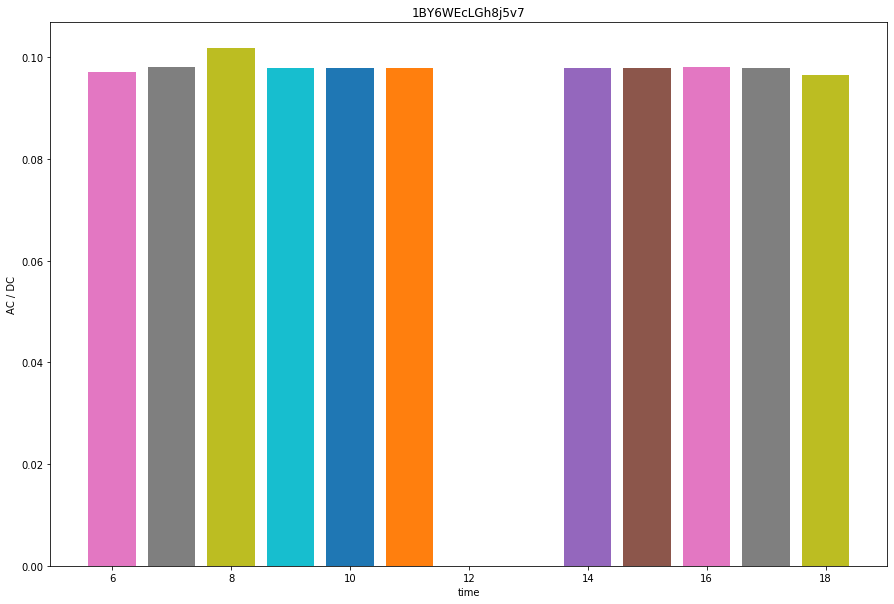

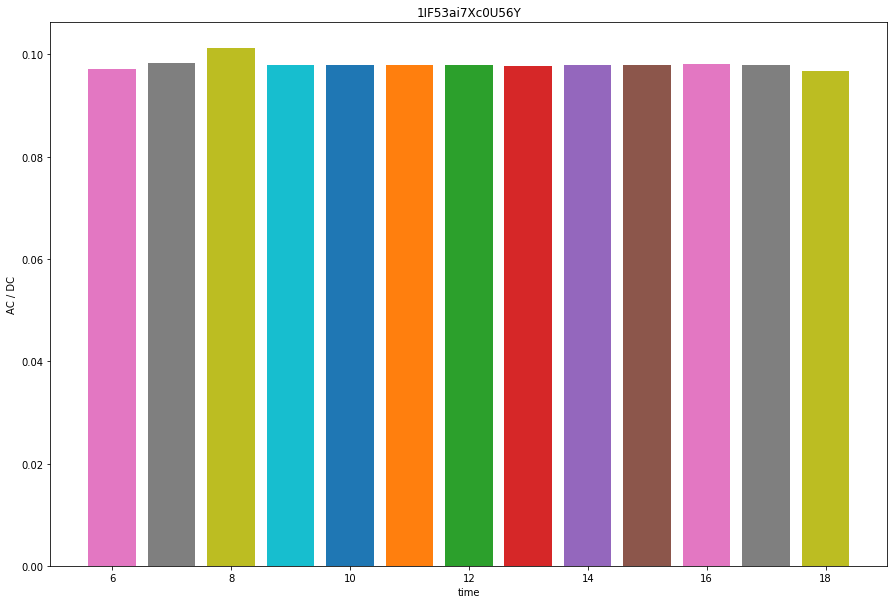

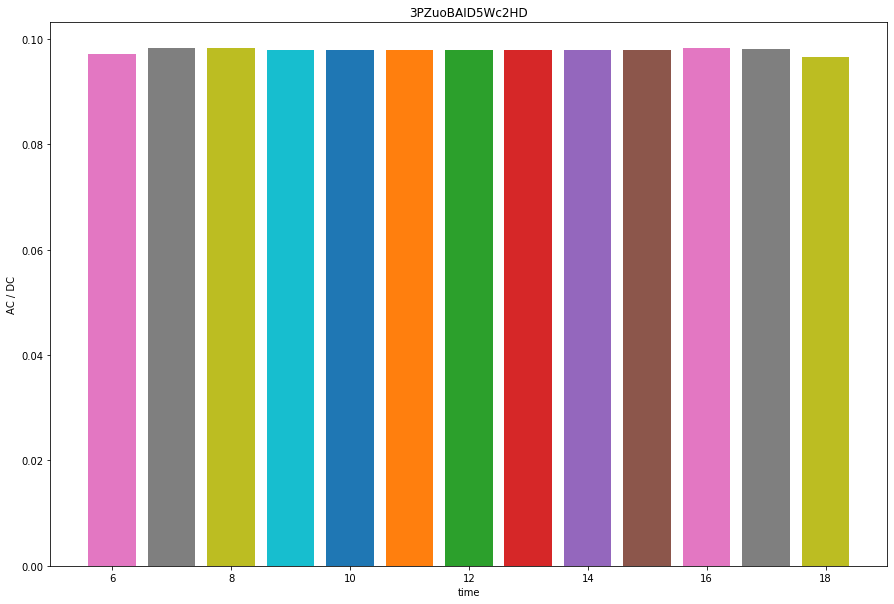

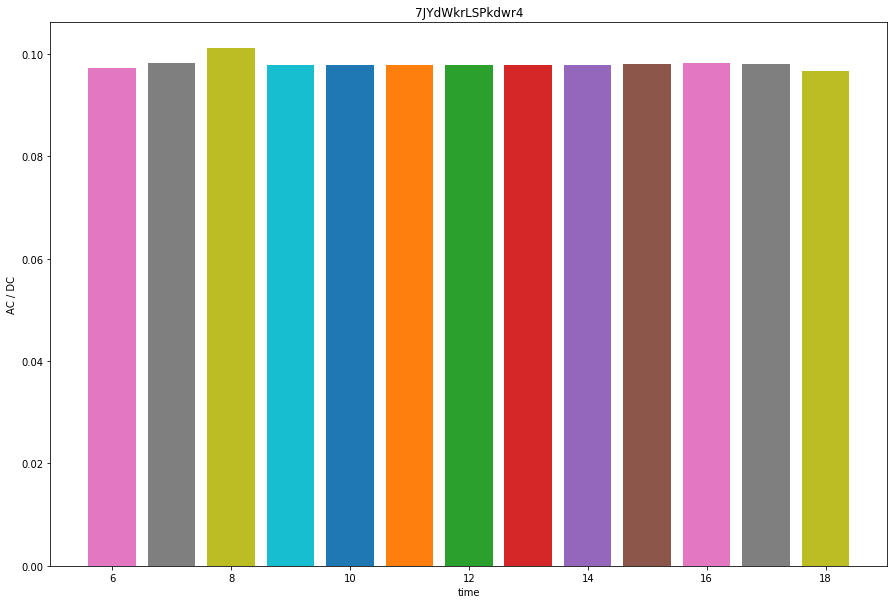

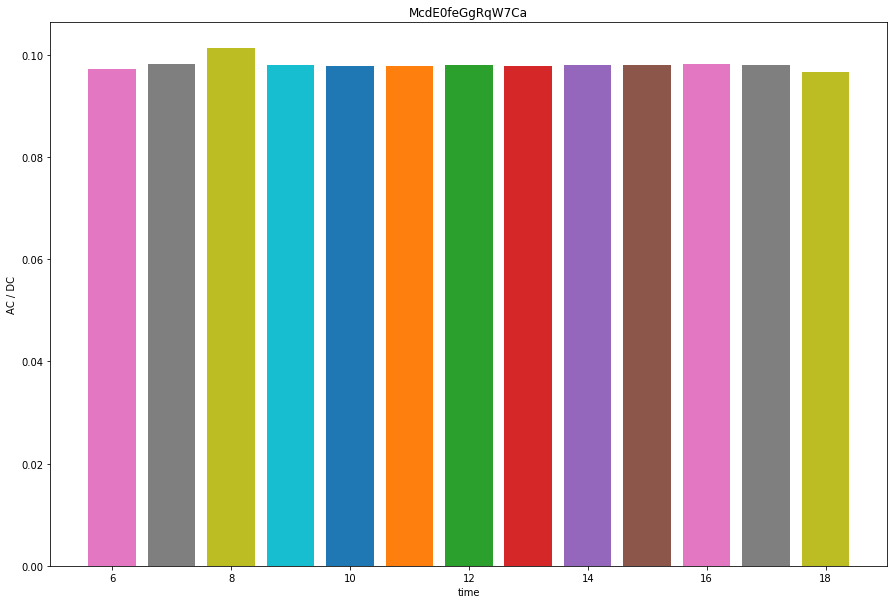

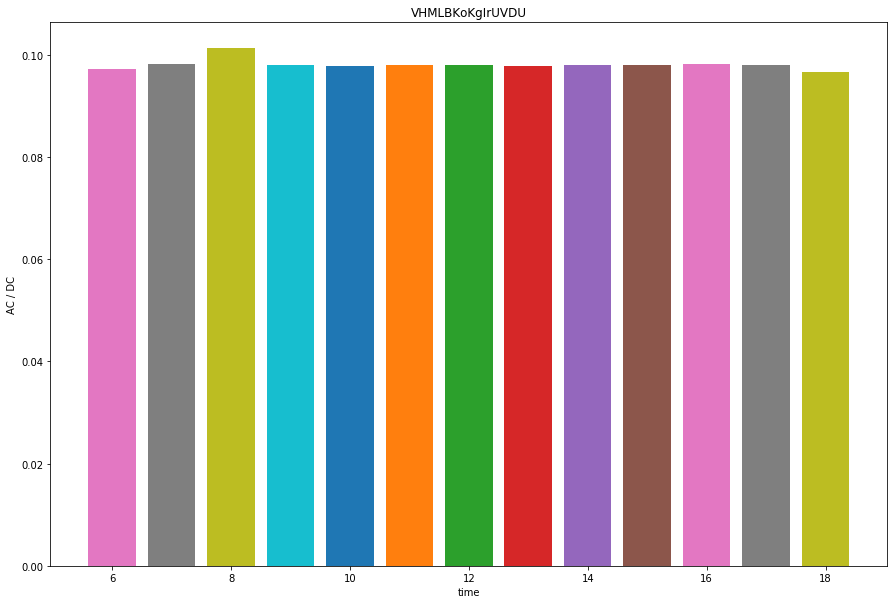

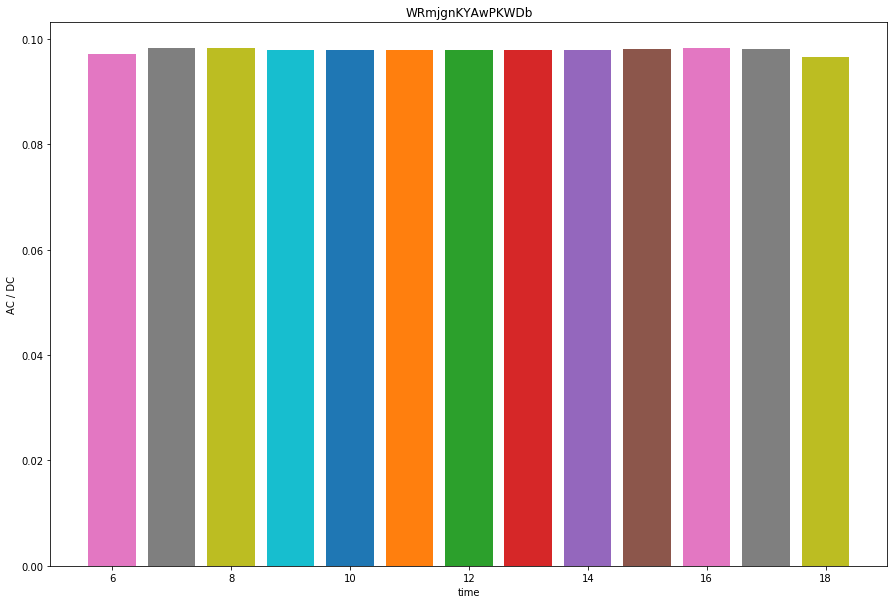

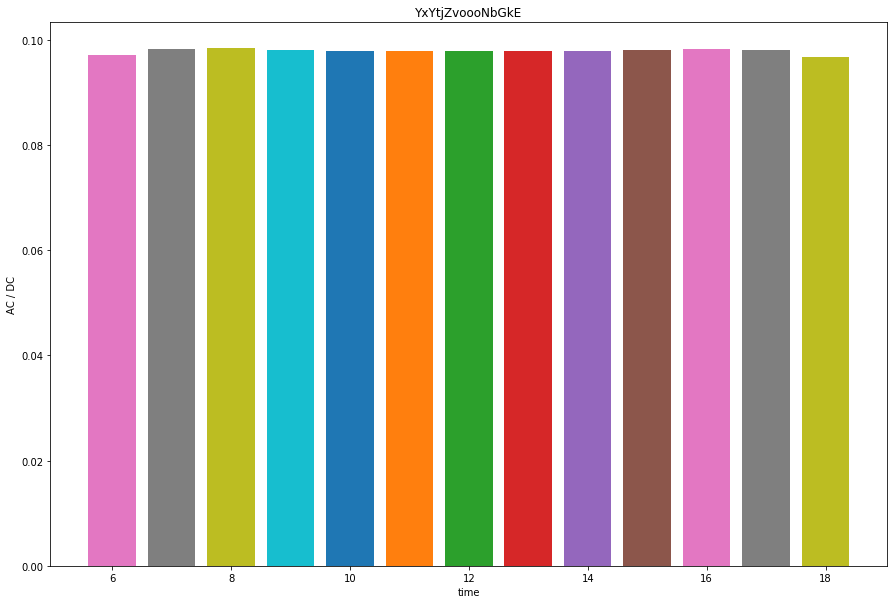

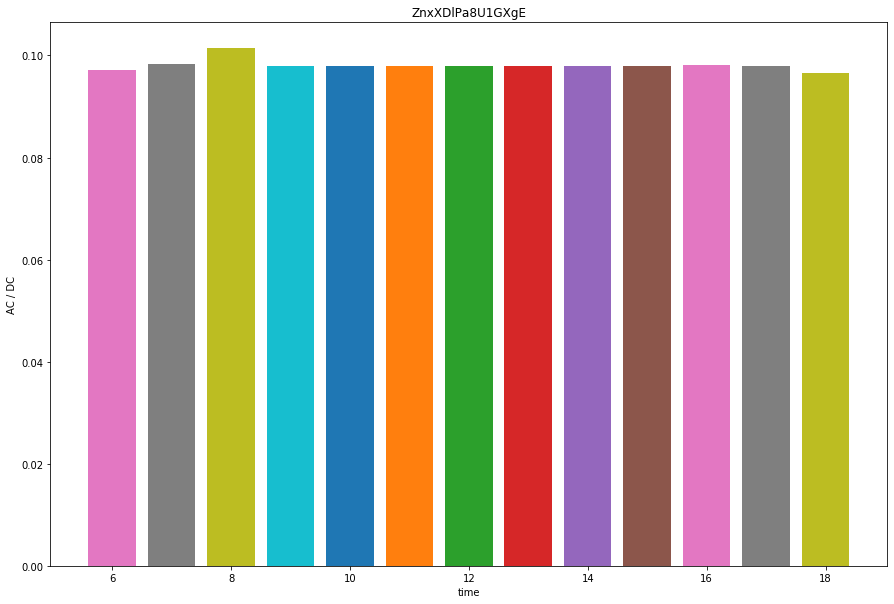

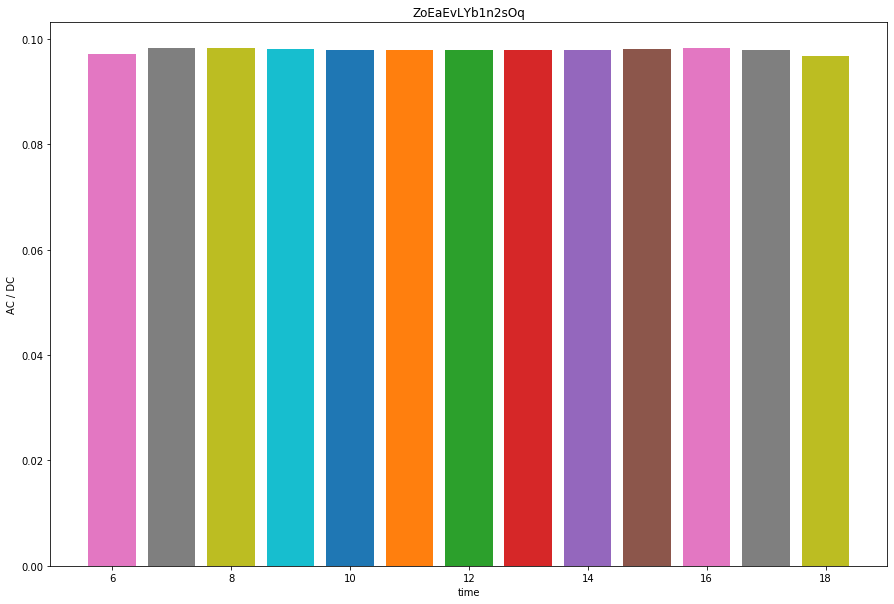

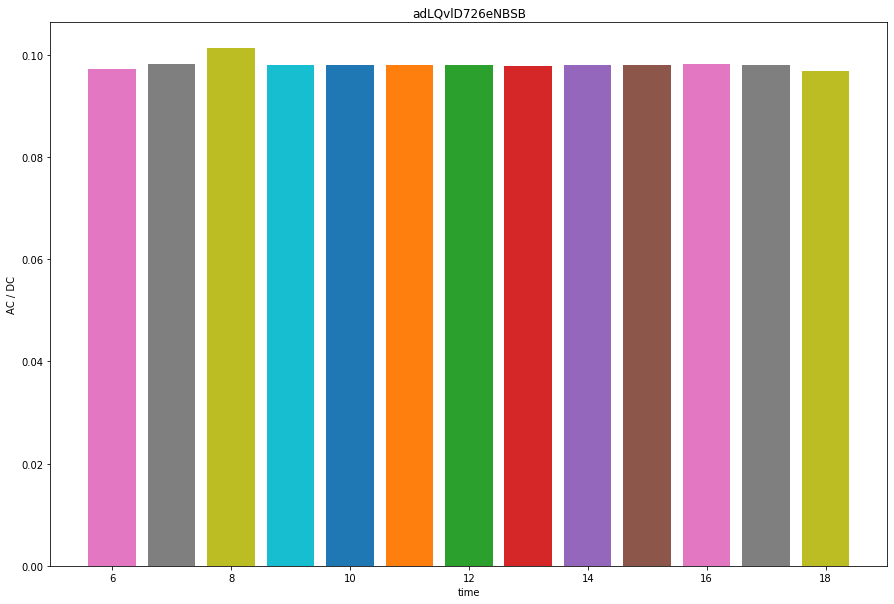

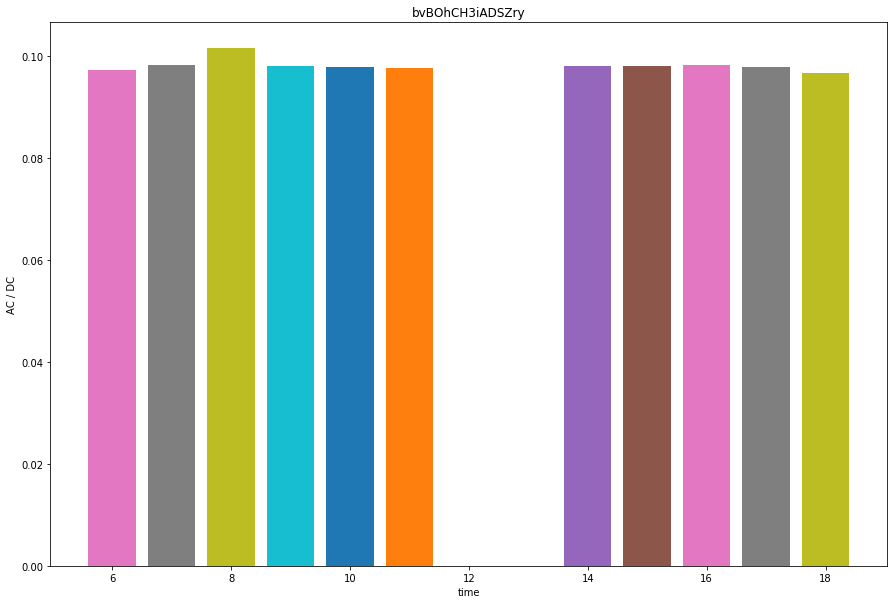

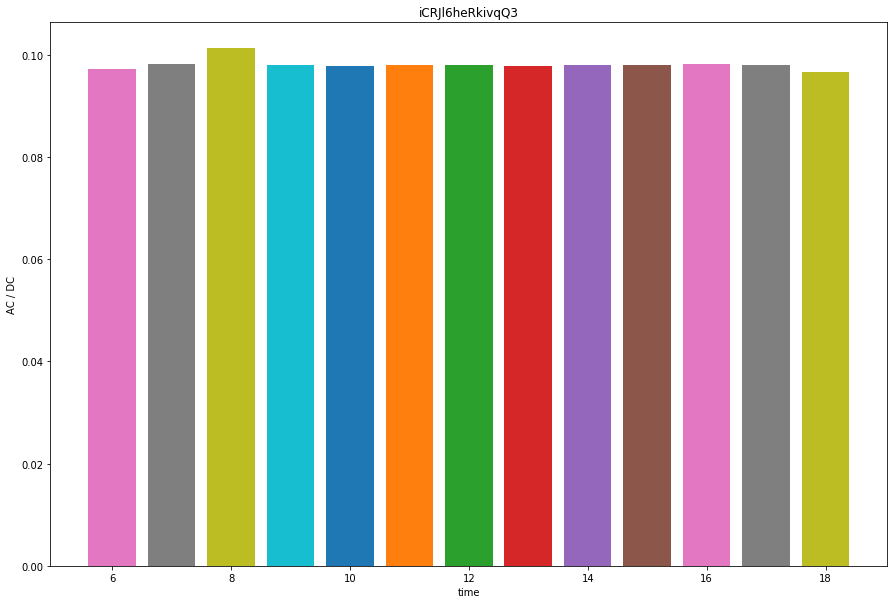

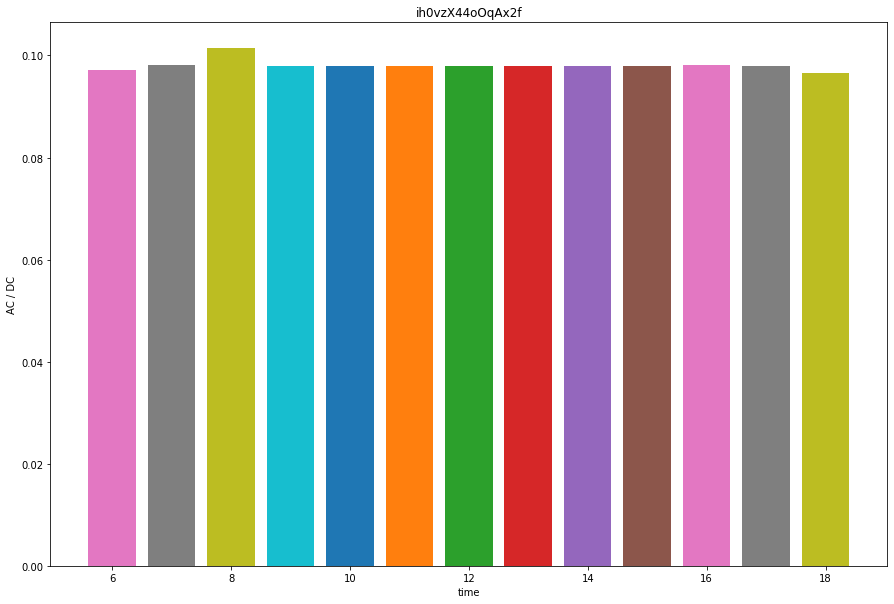

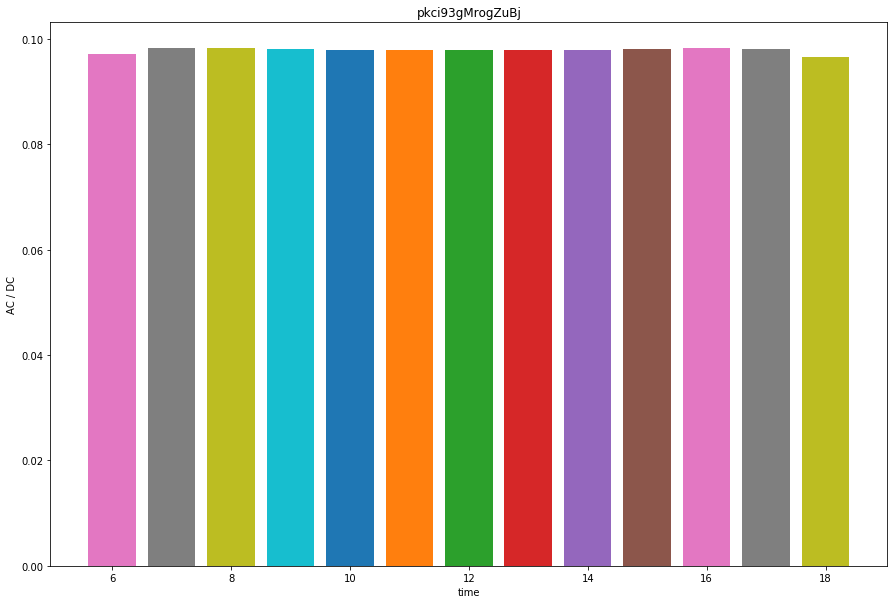

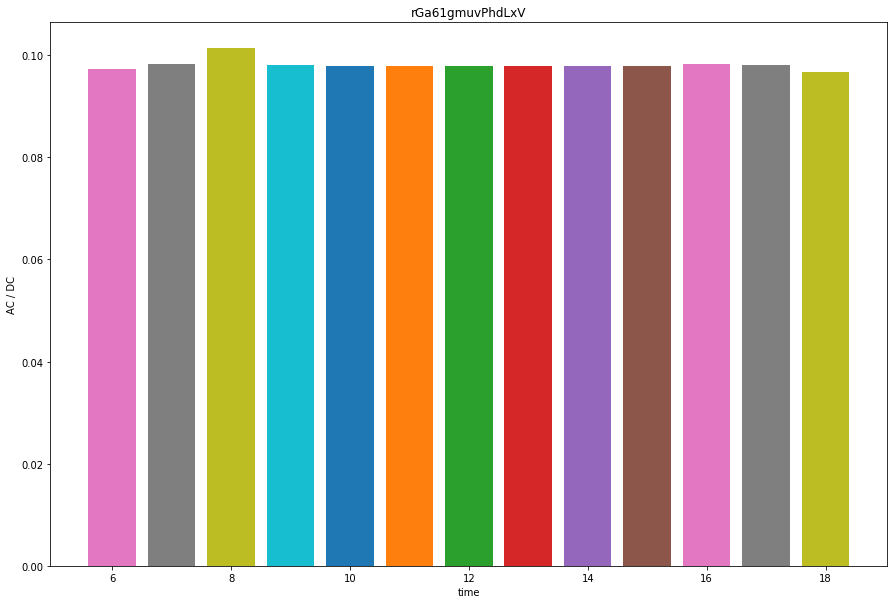

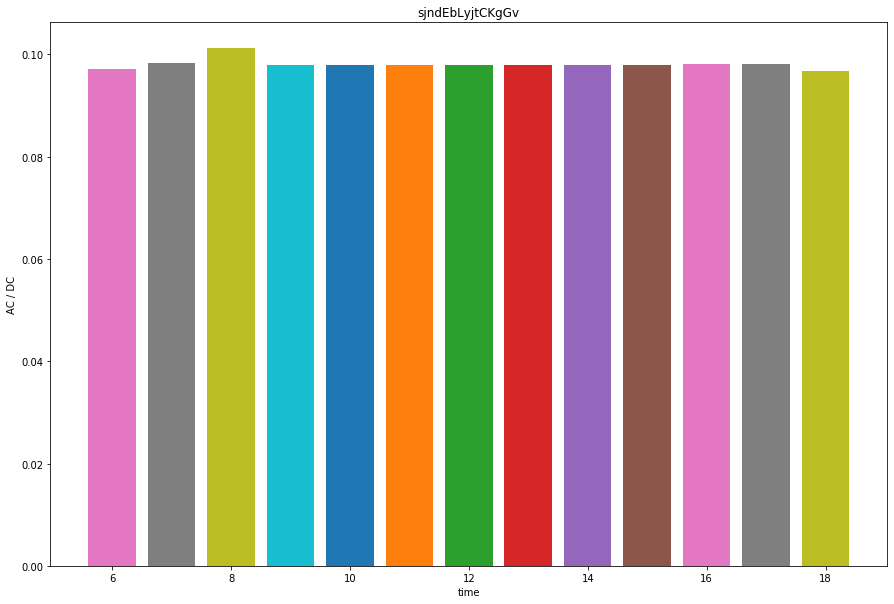

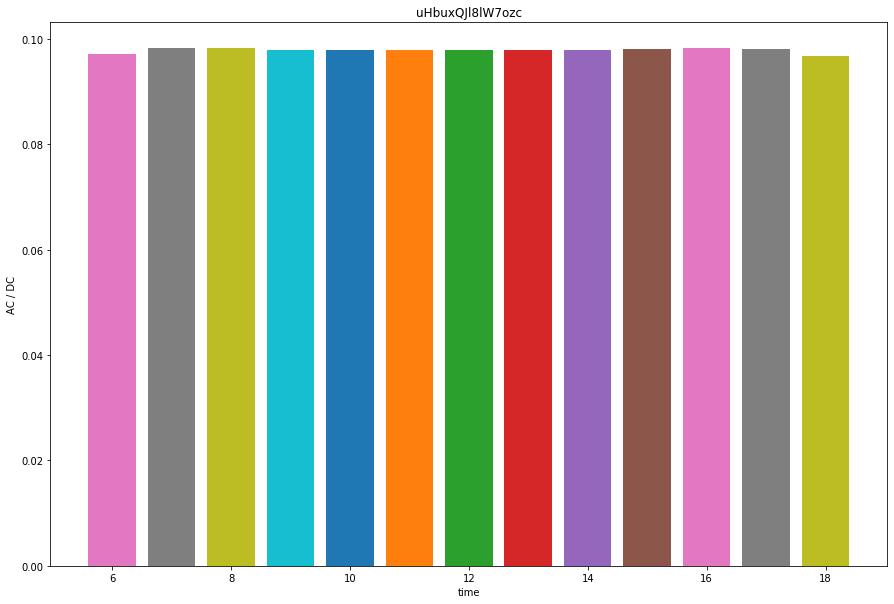

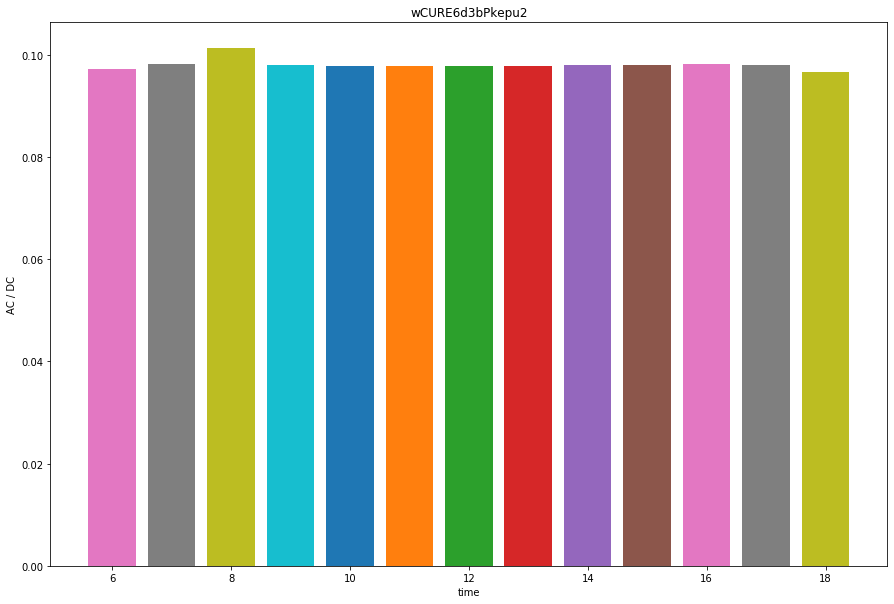

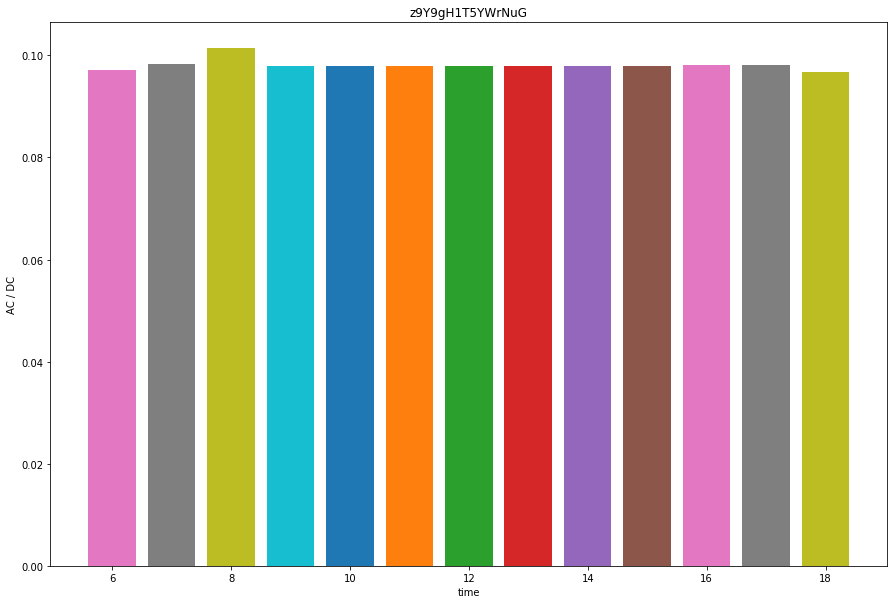

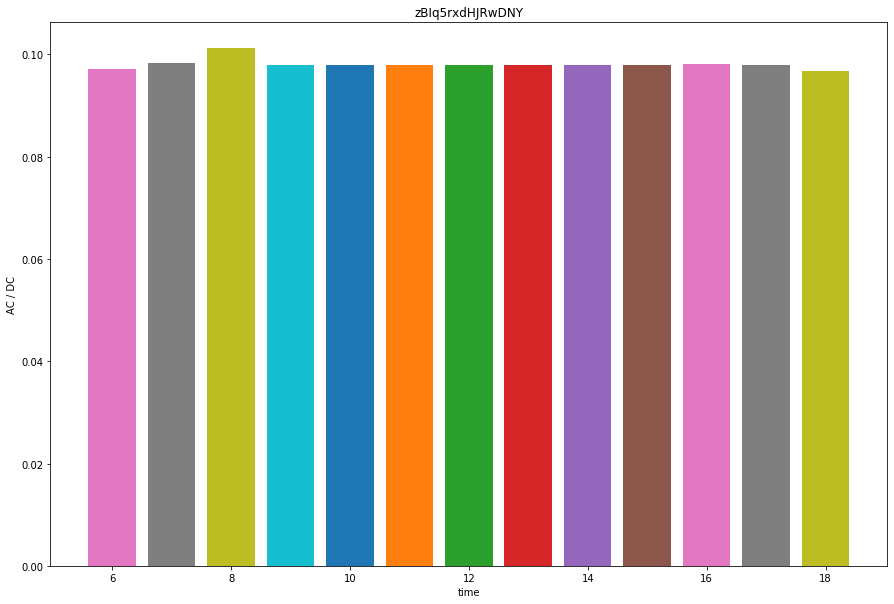

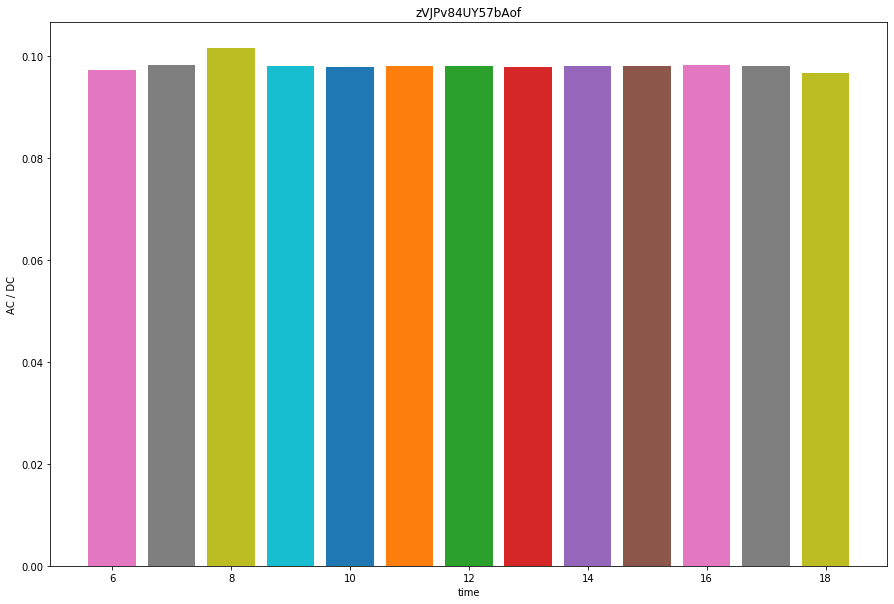

In [31]:
for i, source_key in day166.groupby(day166.SOURCE_KEY):
    plt.figure(figsize=(15, 10))
    for a, b in source_key.groupby(source_key.HOUR):
        ACDC = b.AC_POWER / b.DC_POWER
        plt.bar(b.HOUR, ACDC)
    plt.xlabel('time')
    plt.ylabel('AC / DC')
    plt.title(i)
    plt.show()

We notice that there are empty spaces during between the times 11 and 14, and if we take a look at our data, we can see that for 2 of the inverters, the AC and DC values are 0

In [32]:
inv_1BY6WEcLGh8j5v7=day166[day166.SOURCE_KEY=='1BY6WEcLGh8j5v7']
inv_1BY6WEcLGh8j5v7[ 10 < day166.HOUR].head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
61342,2020-06-14 11:00:00,4135001,1BY6WEcLGh8j5v7,2155.375000,210.900000,2393.625000,6466056.625,166,11:00:00,11
61364,2020-06-14 11:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,11:15:00,11
61386,2020-06-14 11:30:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,11:30:00,11
61408,2020-06-14 11:45:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,11:45:00,11
61430,2020-06-14 12:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:00:00,12
61452,2020-06-14 12:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:15:00,12
61474,2020-06-14 12:30:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:30:00,12
61496,2020-06-14 12:45:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,12:45:00,12
61518,2020-06-14 13:00:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,13:00:00,13
61540,2020-06-14 13:15:00,4135001,1BY6WEcLGh8j5v7,0.000000,0.000000,2402.000000,6466065.000,166,13:15:00,13


In [33]:
inv_bvBOhCH3iADSZry=day166[day166.SOURCE_KEY=='bvBOhCH3iADSZry']
inv_bvBOhCH3iADSZry[ 10 < day166.HOUR].head(15)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,DAY,TIME,HOUR
61353,2020-06-14 11:00:00,4135001,bvBOhCH3iADSZry,2474.500000,241.637500,2368.000000,6520010.000,166,11:00:00,11
61375,2020-06-14 11:15:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,11:15:00,11
61397,2020-06-14 11:30:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,11:30:00,11
61419,2020-06-14 11:45:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,11:45:00,11
61441,2020-06-14 12:00:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:00:00,12
61463,2020-06-14 12:15:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:15:00,12
61485,2020-06-14 12:30:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:30:00,12
61507,2020-06-14 12:45:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,12:45:00,12
61529,2020-06-14 13:00:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,13:00:00,13
61551,2020-06-14 13:15:00,4135001,bvBOhCH3iADSZry,0.000000,0.000000,2378.000000,6520020.000,166,13:15:00,13


In [34]:
day166_w=weather_data[weather_data['DAY']==166]
day166_w[ 10 < day166_w.HOUR].head(20)

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION,DAY,TIME,HOUR
2842,2020-06-14 11:00:00,4135001,HmiyD2TTLFNqkNe,27.081069,47.275213,0.640661,166,11:00:00,11
2843,2020-06-14 11:15:00,4135001,HmiyD2TTLFNqkNe,26.948706,43.949264,0.650214,166,11:15:00,11
2844,2020-06-14 11:30:00,4135001,HmiyD2TTLFNqkNe,26.847070,46.031458,0.662152,166,11:30:00,11
2845,2020-06-14 11:45:00,4135001,HmiyD2TTLFNqkNe,25.923041,38.486489,0.426235,166,11:45:00,11
2846,2020-06-14 12:00:00,4135001,HmiyD2TTLFNqkNe,25.218286,37.815925,0.492024,166,12:00:00,12
2847,2020-06-14 12:15:00,4135001,HmiyD2TTLFNqkNe,24.932560,36.606858,0.472765,166,12:15:00,12
2848,2020-06-14 12:30:00,4135001,HmiyD2TTLFNqkNe,24.945296,35.614831,0.454945,166,12:30:00,12
2849,2020-06-14 12:45:00,4135001,HmiyD2TTLFNqkNe,25.431061,37.157001,0.519269,166,12:45:00,12
2850,2020-06-14 13:00:00,4135001,HmiyD2TTLFNqkNe,25.379936,34.780682,0.576180,166,13:00:00,13
2851,2020-06-14 13:15:00,4135001,HmiyD2TTLFNqkNe,25.898873,42.364294,0.734369,166,13:15:00,13


We can see that on day 166, from 11 oclock till 14, the value of AC and DC of the 2 inverters '1BY6WEcLGh8j5v7' and 'bvBOhCH3iADSZry' are 0, but we also see that the irradiation, module and amient temperatures have acceptale values. This could mean that there was a misfunction with the inverters.

# Correlations

## Correlation coefficient of irradiation and module temperature for each day. You will have an array of 30 coefficients for 30 days. Plot the distribution of these coefficients

In [35]:
mod_irr = []
for a, b in weather_data.groupby(weather_data['DAY']):
    c = b['IRRADIATION'].corr(b['MODULE_TEMPERATURE'])
    mod_irr.append(c)

mod_irr = pd.DataFrame(data=np.array(mod_irr), columns=['CORRELATION'])
mod_irr['DAY'] = weather_data['DAY'].unique()
mod_irr.head()

,CORRELATION,DAY
0,0.951646,136
1,0.959582,137
2,0.973150,138
3,0.971743,139
4,0.976674,140


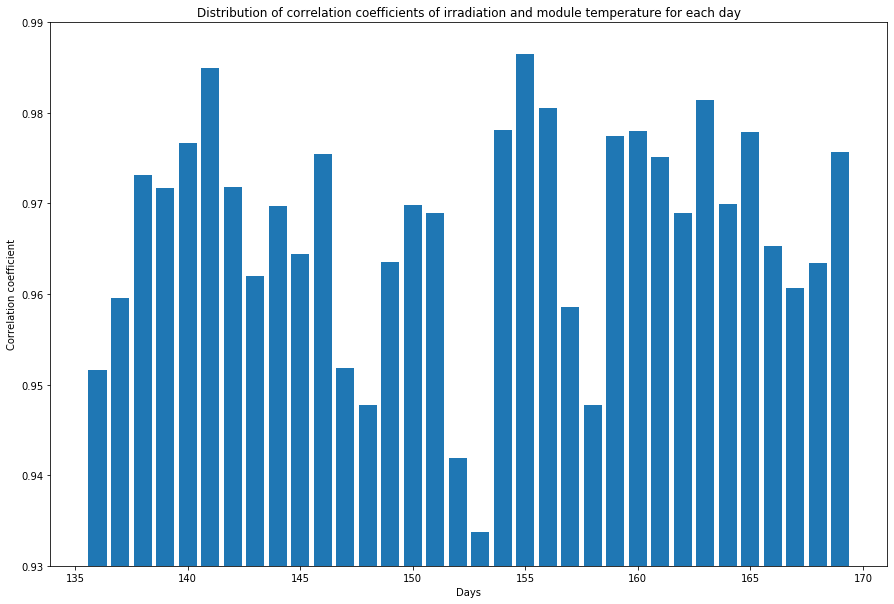

In [36]:
plt.figure(figsize=(15, 10))
plt.bar(mod_irr['DAY'], mod_irr['CORRELATION'])
plt.title('Distribution of correlation coefficients of irradiation and module temperature for each day')
plt.ylabel('Correlation coefficient')
plt.xlabel('Days')
plt.ylim(0.93,0.99)
plt.show()

The lowest correlation coefficients are on days 152 and 153, we will try to investigate the irradiation and module temperatues on those days

In [37]:
day152_w=weather_data[weather_data.DAY==152]
day153_w=weather_data[weather_data.DAY==153]
day155_w=weather_data[weather_data.DAY==155]

In [38]:
# plt.figure(figsize=(15, 10))
# for a, b in day152_w.groupby(day152_w.HOUR):
#     modir = b.IRRADIATION / b.MODULE_TEMPERATURE
#     plt.bar(b.HOUR, modir)
# plt.show()

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


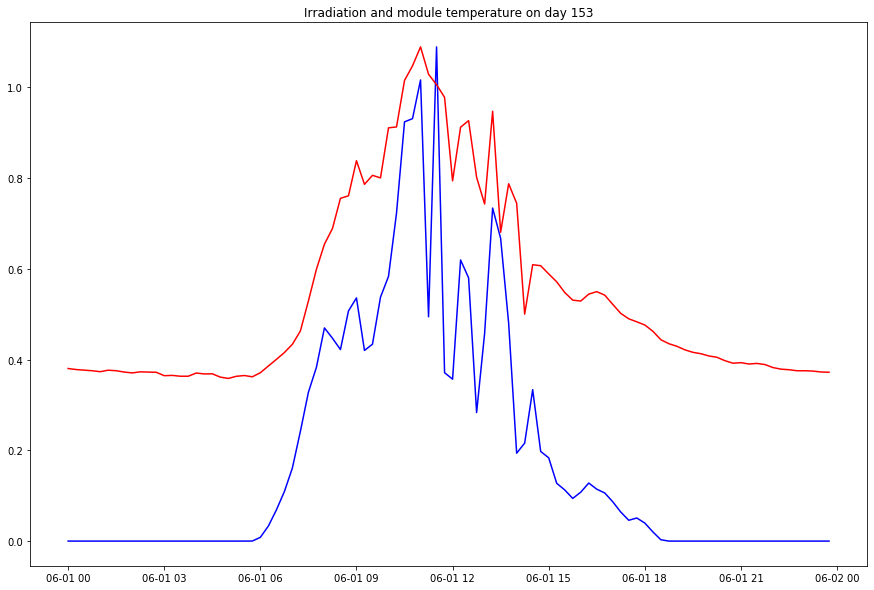

In [39]:
plt.figure(figsize=(15, 10))
scale = day153_w['IRRADIATION'].max() / day153_w['MODULE_TEMPERATURE'].max()
plt.plot(day153_w['DATE_TIME'], day153_w['IRRADIATION'], color='blue')
plt.plot(day153_w['DATE_TIME'], day153_w['MODULE_TEMPERATURE']* scale, color='red')
plt.title('Irradiation and module temperature on day 153')
plt.show()

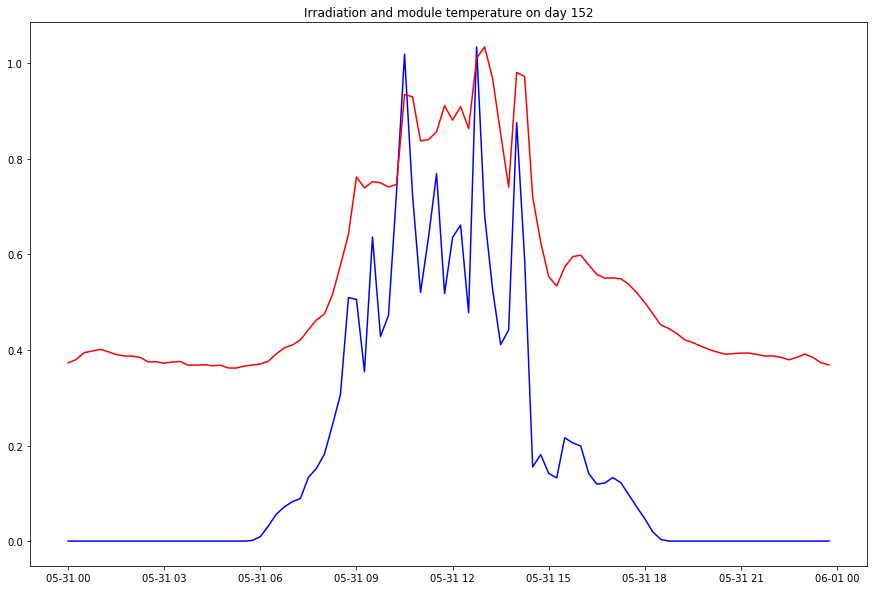

In [40]:
plt.figure(figsize=(15, 10))
scale = day152_w['IRRADIATION'].max() / day152_w['MODULE_TEMPERATURE'].max()
plt.plot(day152_w['DATE_TIME'], day152_w['IRRADIATION'], color='blue')
plt.plot(day152_w['DATE_TIME'], day152_w['MODULE_TEMPERATURE']* scale, color='red')
plt.title('Irradiation and module temperature on day 152')
plt.show()

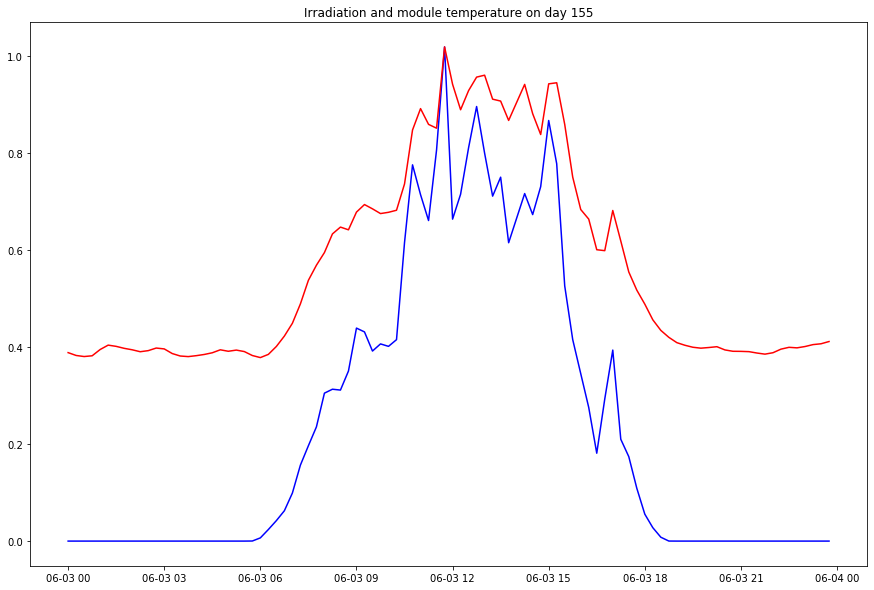

In [41]:

plt.figure(figsize=(15, 10))
scale = day155_w['IRRADIATION'].max() / day155_w['MODULE_TEMPERATURE'].max()
plt.plot(day155_w['DATE_TIME'], day155_w['IRRADIATION'], color='blue')
plt.plot(day155_w['DATE_TIME'], day155_w['MODULE_TEMPERATURE']* scale, color='red')
plt.title('Irradiation and module temperature on day 155')
plt.show()

Comparing the results of the 3 graphs (I chose the day 155 as a model, because the correlation between irradiation and module temperature is pretty high) , it seems like the reason behind the low correlation value is that during the day, some values of the irradiation are lower than the usual.